# COMP30760 Data Science in Python Assignment -2
### <font color = dark red>AHMED JOUDA - 18329393</font>

AHMED JOUDA - 18329393
>- The aim of this analysis is to analyze the impact COVID-19 has had on the movement of people in Ireland, Italy and Sweden.
>- The Google COVID-19 commuting mobility reports which are generated from Google apps, will be used to compare the activity of people in respect to different sectors such as retail and parks.
>- Each country will be analysed seperately then a multi-country analysis will be conducted.
>- This will allow us to analyse and understand the effect the virus has had on different sectors and locate the impacts of national lockdowns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from scipy import spatial

# Task 1: Within Country Analysis 


**<font color= blue>Data Loading: </font>**
>- Use pandas to load the CSV files into dataframes for further manipulation

In [2]:
ireland = pd.read_csv("ireland.csv")
italy = pd.read_csv("italy.csv")
sweden = pd.read_csv("sweden.csv")
#Check if the import worked
ireland.head(5)

,id,country,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,1265158,Ireland,2020-03-01,3.0,3.0,-5.0,2.0,2.0,0.0
1,1265159,Ireland,2020-03-02,4.0,4.0,12.0,1.0,1.0,0.0
2,1265160,Ireland,2020-03-03,8.0,5.0,29.0,2.0,3.0,-1.0
3,1265161,Ireland,2020-03-04,5.0,4.0,25.0,1.0,1.0,0.0
4,1265162,Ireland,2020-03-05,4.0,4.0,15.0,0.0,2.0,0.0


**<font color= blue>Pre-processing: </font>**
>- Rename the columns to shorter names
>- Change the date strings to datetime object
>- Re-index the dataframes using the date as the new index
>- Drop the columns that are not needed
>- Check for missing values

In [3]:
countries = [ireland, italy, sweden]

for i in range(len(countries)):
    #Rename the columns in the dataframes for ease of presentation
    countries[i] = countries[i].rename(columns={"retail_and_recreation_percent_change_from_baseline": "Retail & Rec", 
                                      "grocery_and_pharmacy_percent_change_from_baseline": "Grocery & Pharma",
                                      "parks_percent_change_from_baseline": "Parks", 
                                      "transit_stations_percent_change_from_baseline": "Transit Stations",
                                      "workplaces_percent_change_from_baseline": "Workplaces", 
                                      "residential_percent_change_from_baseline": "Residential",
                                      "date": "Date"})
    #Change the string date to dateTime object
    countries[i]['Date'] = pd.to_datetime(countries[i]['Date'])
    #Set the date as the index of the dataframe
    countries[i] =countries[i].set_index('Date')
    #Drop the not needed 'id' and 'country' column
    countries[i] = countries[i].drop(['id','country'], axis=1)

ireland = countries[0]
italy = countries[1]
sweden = countries[2]

In [4]:
#Checking for missing values in the 3 dataframes
#Through summing all the null values in all the fields,we can look for the missing data  
#Checking if any of the numeric data is not string

print("-----IRELAND-----IRELAND-----IRELAND-----IRELAND-------")
print(ireland.isnull().sum())
print("Check for Strings:\n",ireland.dtypes.value_counts())
print("-----ITALY-----ITALY-----ITALY-----ITALY-----ITALY-----")
print(italy.isnull().sum())
print("Check for Strings:\n",italy.dtypes.value_counts())
print("-----SWEDEN-----SWEDEN-----SWEDEN-----SWEDEN-----SWEDEN")
print(sweden.isnull().sum())
print("Check for Strings:\n",sweden.dtypes.value_counts())

-----IRELAND-----IRELAND-----IRELAND-----IRELAND-------
Retail & Rec        0
Grocery & Pharma    0
Parks               0
Transit Stations    0
Workplaces          0
Residential         0
dtype: int64
Check for Strings:
 float64    6
dtype: int64
-----ITALY-----ITALY-----ITALY-----ITALY-----ITALY-----
Retail & Rec        0
Grocery & Pharma    0
Parks               0
Transit Stations    0
Workplaces          0
Residential         0
dtype: int64
Check for Strings:
 float64    6
dtype: int64
-----SWEDEN-----SWEDEN-----SWEDEN-----SWEDEN-----SWEDEN
Retail & Rec        0
Grocery & Pharma    0
Parks               0
Transit Stations    0
Workplaces          0
Residential         0
dtype: int64
Check for Strings:
 float64    6
dtype: int64


From above we see:</p>  
>-There are no Null values in the data.</p>
>-There are also no strings in the data.</p>  
>-Therefore no values such as "Not Available" are in the dataset.</p>  
>-This is highly indicative that all values are present.

**<font color= blue>Graphing Functions: </font>**
>- In order to make the code more eligible

In [5]:
#Graphing Functions
#Round up to nearest 100 for axis limits
def roundup100(x):
     return int(math.ceil(x / 100.0)) * 100
#Graph subplots, allow for moving averages too   
def graphsubs(dframe, ma=0):
    fig, axs = plt.subplots(nrows=3,ncols=2, figsize=(15,15))
    yax=0        
    if ma==30:  
        for ax in axs.reshape(-1):
            dframe.iloc[:,yax].rolling(30).mean().plot(ax=ax,title = "% Change in "+dframe.iloc[:,yax].name+" (30 days rolling)")
            yax=yax+1
            ax.axhline(linewidth=2, color='y', linestyle="--")
            ax.set_ylim(ymin=-100, ymax=roundup100(max(dframe.max())))
            ax.set_ylabel("Percentage Change %")
        plt.tight_layout()
    
    elif ma==7:
        for ax in axs.reshape(-1):
            dframe.iloc[:,yax].rolling(7).mean().plot(ax=ax,title = "% Change in "+dframe.iloc[:,yax].name+" (7 days rolling)")
            yax=yax+1
            ax.axhline(linewidth=2, color='y', linestyle="--")
            ax.set_ylim(ymin=-100, ymax=roundup100(max(dframe.max())))
            ax.set_ylabel("Percentage Change %")
        plt.tight_layout()
    
    else:
        for ax in axs.reshape(-1):
            dframe.iloc[:,yax].plot(ax=ax,title = "% Change in "+dframe.iloc[:,yax].name)
            yax=yax+1
            ax.axhline(linewidth=2, color='y', linestyle="--")
            ax.set_ylim(ymin=-100, ymax=roundup100(max(dframe.max())))
            ax.set_ylabel("Percentage Change %")
        plt.tight_layout()
        
        
#Graph simple polts   
def graphplot(toplot,title,xl,yl,ymin,ymax):
    ax = toplot.plot(title = title, figsize=(10,5))
    ax.set_xlabel(xl)
    ax.set_ylabel(yl)
    ax.set_ylim(ymin=ymin, ymax=ymax)
    plt.show()
     
#Seaborn plots
def seabornplot(df,x,y,plottype):
    if plottype == "jointplot":
        sns.jointplot(x=x, y=y, data=df, kind='reg')
        plt.tight_layout()
    elif  plottype == "distplot":
        sns.displot(df, x=x, y=y, stat="density", common_norm=False)
        plt.show()

***<font color= RED> IRELAND </font>***
## Ireland

**<font color= blue>Part (a): Construct a set of time series that represent the mobility patterns for the different location categories </font>**
>- Plot a subplot with a time series for each location category

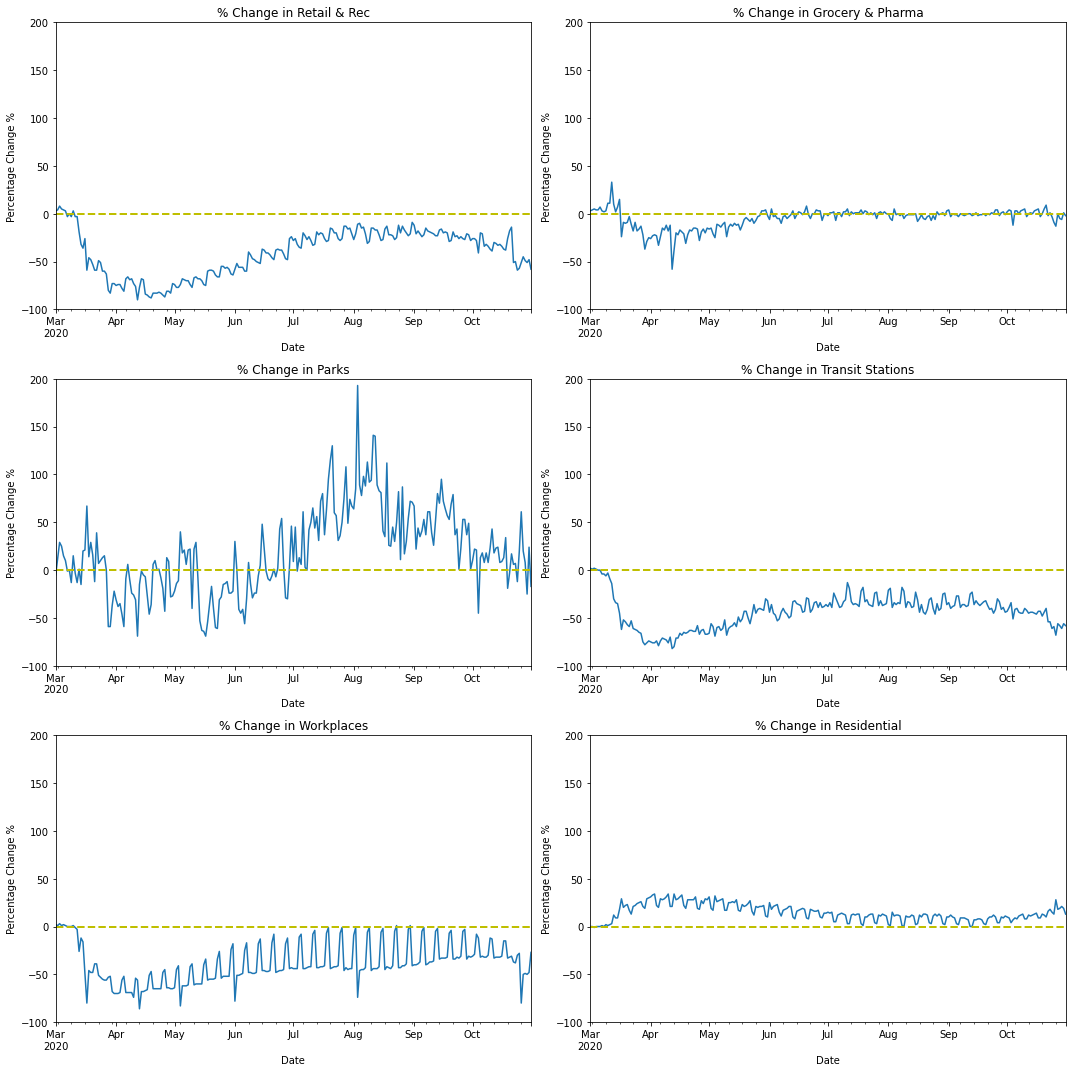

In [6]:
#IRELAND
graphsubs(ireland)

**<font color= blue>Part (b): Characterise and visualise each of these time series </font>**
>- Visual inspection
>- Identification of peaks and troughs
>- Compute summary statistics
>- Identify general trends via smoothing and grouping
>- Conclude the summary of each graph and why it acted that way

**Visual Inspection**  
1) *Retail & Recreation:*
- Nearly fully below the baseline
- Major Drop in April and a significant drop in October

2) *Groceries & Pharmacies:*
- Fluctuates at the start then evens out
- Huge peak second week of March followed by a huge dip for the next 10 weeks
- Right on the baseline (regular activity) from June till October

3) *Parks:*
- By far the most unstable
- Fluctuates a lot above and below the baseline
- Highest peak amongst all the series happens here mid-summer

4) *Transit Stations:*
- Completely below the baseline
- Major Drop in April, slight increase during the summer then drops again

5) *Workplaces:*
- Fully below the baseline
- Has a zigzag (up & down) pattern nearly weekly
- Overall trend drop in April and October

6) *Residential Areas:*
- Fully above the baseline, the only category to have only an increase in usage
- Weekly cycles can be noted
- Overall trend increase during March-May and October-November

**After the above quick overview of the simple time series let us conduct some more indepth characterisations**

**Summary Statistics**

In [7]:
ireland.describe()

,Retail & Rec,Grocery & Pharma,Parks,Transit Stations,Workplaces,Residential
count,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000
mean,-40.502041,-4.795918,18.587755,-43.404082,-38.306122,14.559184
std,24.049918,10.046163,43.762556,17.147264,20.755410,8.635229
min,-90.000000,-58.000000,-69.000000,-82.000000,-86.000000,-1.000000
25%,-60.000000,-10.000000,-12.000000,-56.000000,-51.000000,9.000000
50%,-34.000000,-2.000000,14.000000,-41.000000,-42.000000,13.000000
75%,-21.000000,1.000000,46.000000,-34.000000,-30.000000,21.000000
max,8.000000,33.000000,193.000000,2.000000,3.000000,34.000000


From the above table we can see:
>- There are 245 entries
>- Retail, Groceries, Transit and Workplaces all have a negative mean change showing that they are being visited less since March
>- Parks and Residential have a positive mean change telling us that they have been frequented more than usual since March
>- We can see that the most negative change from baseline was in Retail & Recreation at -90%
>- We can see that the most positive change from baseline was in Parks at 193%
>- The location that varied the most and had the largest standard deviation is Parks and the least being Residential at only 8%, which could mean there was not much change in Residential activity before and after the pandemic.

**Identify Troughs and Peaks**

In [8]:
print('Grocery & Pharmacies % change')
print('********PEAKS*******')
print(ireland["Grocery & Pharma"].sort_values(ascending=False).head(3))
print('********TROUGHS*******')
print(ireland["Grocery & Pharma"].sort_values().head(3))

Grocery & Pharmacies % change
********PEAKS*******
Date
2020-03-12    33.0
2020-03-16    15.0
2020-03-11    11.0
Name: Grocery & Pharma, dtype: float64
********TROUGHS*******
Date
2020-04-12   -58.0
2020-04-13   -38.0
2020-03-29   -37.0
Name: Grocery & Pharma, dtype: float64


- From the above we can that commuting mobility at groceries and pharmacies peaked on the 12th of March which is the day the Irish Prime minister annouced the closure of schools, colleges and promoted remote working. Many people went to grocery stores to panic buy as stores ran out of products.
- The second and third peaks are less than half of that on the 12th of March, however they are in the same week (11th and 16th of March). The 11th of March was the day the WHO declared COVID-19 as a pandemic and the 15th of March was the day Irish pubs were ordered to close. Thus those mini peaks are associated with panic buying again as people thought stores will run out of products.
- The two main troughs occured on the 12th and 13th of April which are likely due to the Easter Sunday and Monday during which many shops close and people have already stocked up on food to cook on those days. In addition people likely already had so much food stocked from a month before that they did not need to visit the stores. In addition the virus was spreading at an alarming rate therefore people tried to stay at home. The same can be said for the 29th of March trough.

In [9]:
print('Workplaces % change')
print('********PEAKS*******')
print(ireland["Workplaces"].sort_values(ascending=False).head(10))
print('********TROUGHS*******')
print(ireland["Workplaces"].sort_values().head(10))

Workplaces % change
********PEAKS*******
Date
2020-03-03    3.0
2020-03-01    2.0
2020-03-05    2.0
2020-03-06    1.0
2020-08-23    1.0
2020-08-30    1.0
2020-03-10    1.0
2020-03-04    1.0
2020-03-02    1.0
2020-03-07    0.0
Name: Workplaces, dtype: float64
********TROUGHS*******
Date
2020-04-13   -86.0
2020-05-04   -83.0
2020-10-26   -80.0
2020-03-17   -80.0
2020-06-01   -78.0
2020-04-10   -74.0
2020-08-03   -74.0
2020-04-02   -70.0
2020-04-01   -70.0
2020-03-31   -70.0
Name: Workplaces, dtype: float64


- From the above we can that commuting mobility at workplaces peaked at the start of March before any restrictions. Note that this "peak" is simply normal level of activity. Two of the top 10 peaks are after restrictions, those are the 23rd and 30th of August. Note that both these days are summer weekends with normally very little mobility around workplaces thus the lack of mobility after restrictions still left it at the baseline.
- Note that six of the top 10 troughs are bank holidays in Ireland, thus the drops are expected as most workplaces shut down compared to a normal day. The remaining 4 days are at the start of April amidst the first, strict lockdown which shutdown most workplaces.

In [10]:
print('Parks % change')
print('********PEAKS*******')
print(ireland["Parks"].sort_values(ascending=False).head(5))

Parks % change
********PEAKS*******
Date
2020-08-03    193.0
2020-08-11    141.0
2020-08-12    140.0
2020-07-21    130.0
2020-07-20    115.0
Name: Parks, dtype: float64


- The peak day for Parks was the 3rd of August which is due to many factors. Firstly seasonal, in the summer people like to go to parks. Secondaly, it was a bank holiday in Ireland thus people had the time to go to parks. Finally, the restrictions were not that strict which allowed people to travel to parks.
- The remaining top 5 peaks all lie in the summer proving the importance of seasonality for this location category. This is also related to the lenient restrictions during the summer.

In [11]:
print('Retail % change')
print('********TROUGHS*******')
print(ireland["Retail & Rec"].sort_values().head(10))

Retail % change
********TROUGHS*******
Date
2020-04-12   -90.0
2020-04-19   -88.0
2020-04-18   -87.0
2020-04-26   -87.0
2020-04-17   -85.0
2020-04-25   -85.0
2020-04-16   -84.0
2020-04-22   -83.0
2020-04-29   -83.0
2020-04-24   -83.0
Name: Retail & Rec, dtype: float64


- All top 10 troughs for retail and recreation are during April, amidst the first national lockdown which closed down nearly all businesses in this sector thus the huge drop in numbers.
- The largest trough on the 12th of April was also Easter thus having a staggering -90% change.

**Identify General Trends**   
Done using moving averages with different intervals to smooth the graphs

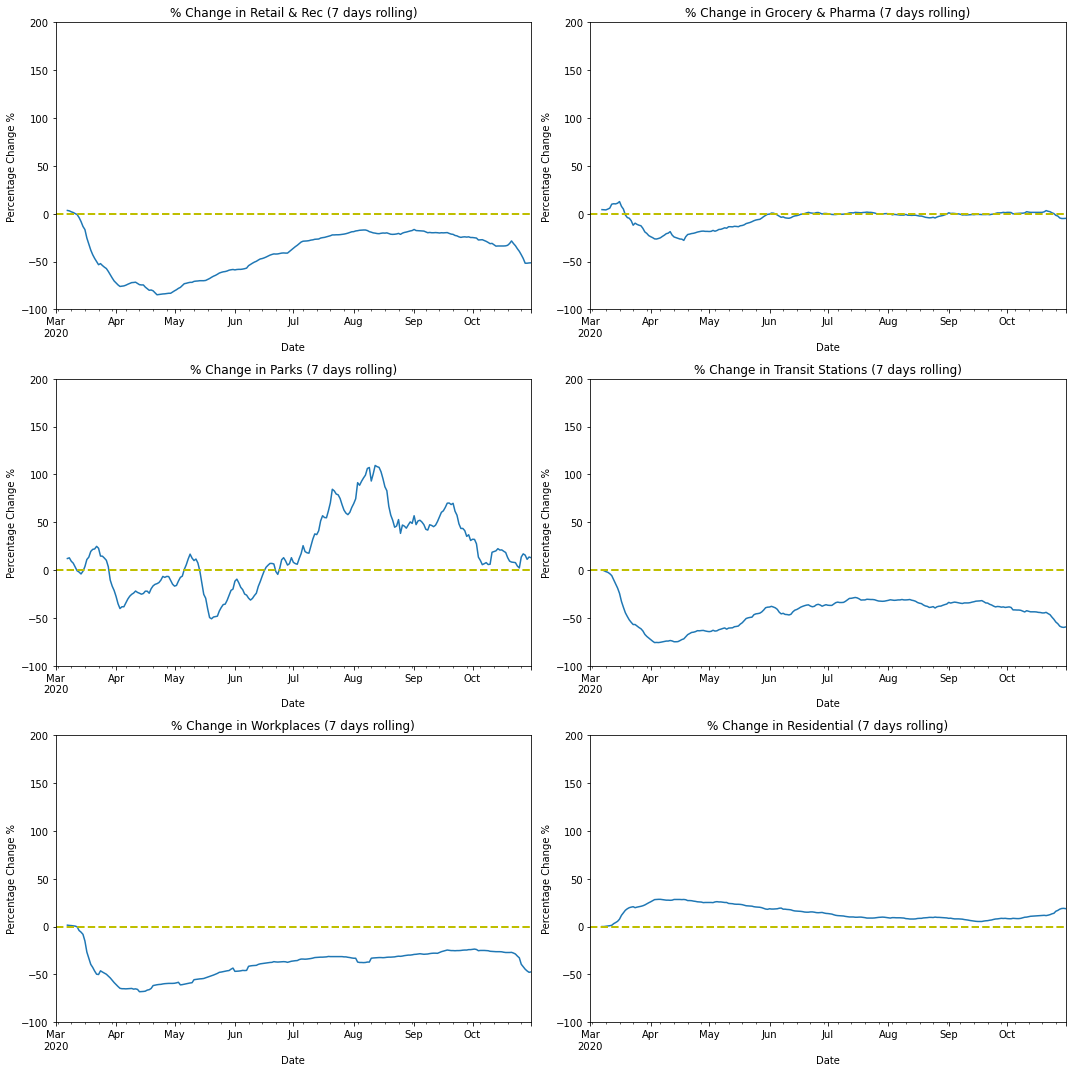

In [12]:
graphsubs(ireland,7)

General Trends at 7 day rolling mean:
- *Retail & Rec:*  
We can see a huge dip in March/April followed by a slow and steady rise back to normal levels during the summer which then drops again. Some outliers/irregularities can be noticed possibly due to holidays such as Halloween and Easter.
- *Grocery & Pharma:*  
Peaks irregulary at the start of March then drops unexpectedly throughout April, then from June onwards follows the expected baseline without unusual activity. Some outliers/irregularities can be noticed possibly due to holidays.
- *Parks:*  
Extremely high variance which can be related to weather conditions (seasonality). Peaks throughout the summer and drops again once October starts. Some rises correlate to bank holidays.
- *Transit Stations:*  
Sharp drop during March then slowly recovers until June. From June onwards remains steady on the same level slightly below the baseline. Downward trend noticed in October likely due to the second national lockdown.
- *Workplaces:*  
Significant drop from Mid-March till April then slow but irregular recovery throughout the summer. Recovery did not reach the baseline as a new trough hit at the end of October. Significant drops can be seen around public holidays.
- *Residential:*  
Quite regular and stable. Slight peak up to 30% increase from baseline during the first lockdown (March-June) due to people being allowed only 2KM from their houses. Starting from the summer a normal trend can be seen very close to the baseline. An upward trend can be noticed at the end of October due to the 5KM restrictions imposed in the second lockdown.

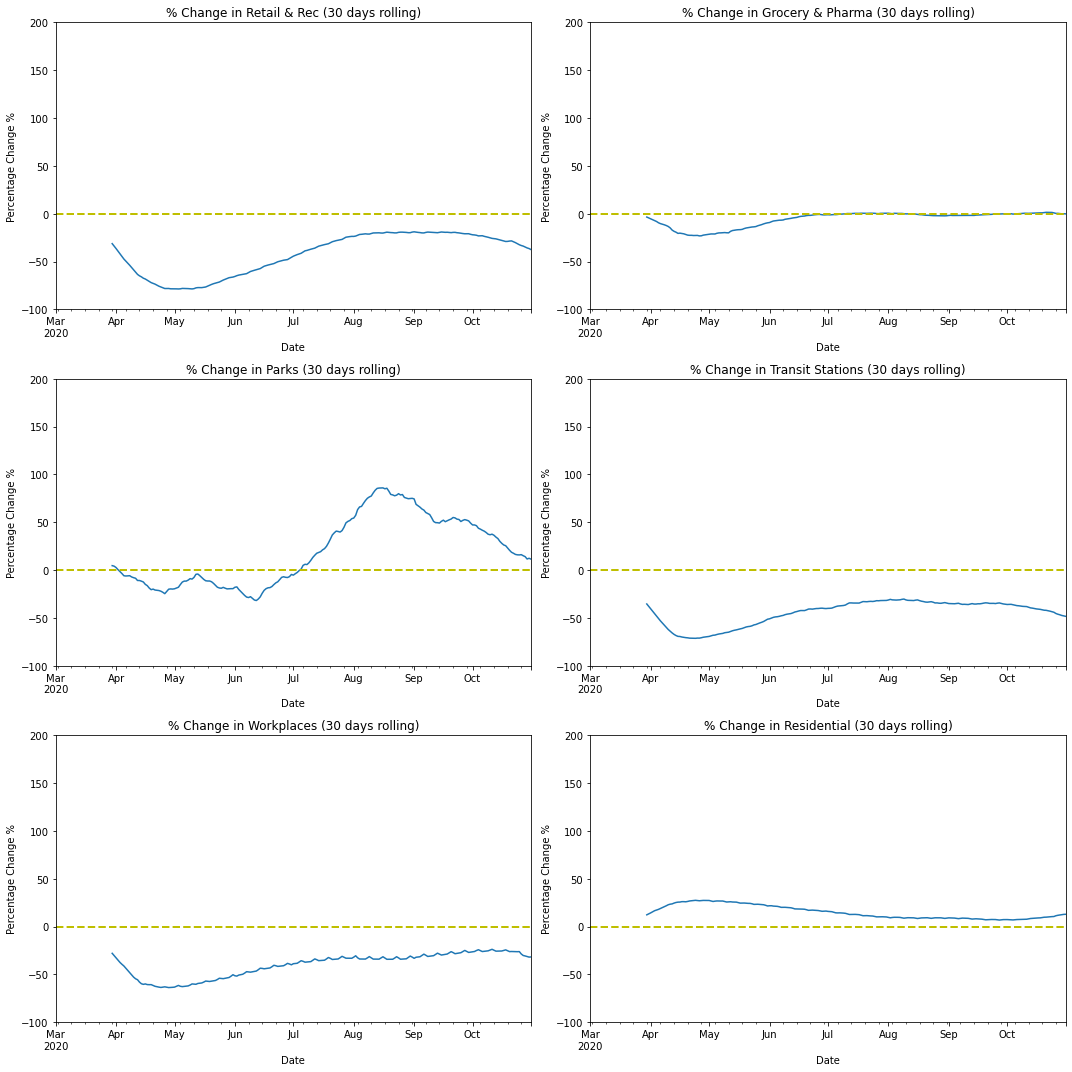

In [13]:
# apply the rolling mean
graphsubs(ireland, 30)

General Trends at 30 day rolling mean:
- *Retail & Rec:*  
A much smoother trend can be seen with the effect of outliers such as holidays removed. A dip from March till June can be seen which then reverses its direction upwards but at a smaller slope thus taking longer to recover. During the summer it nearly reaches the baseline but then falls again in October due to another lockdown. A slight upward trend outlier can be seen in October likely linked to Halloween shopping.
- *Grocery & Pharma:*  
The small peak at the start of March caused by panic shopping is removed here. Leaving us with a more general trend of grocery & pharma mobility dropping during the first lockdown then returning to normal baseline levels from June.
- *Parks:*  
Seasonality still highly evident as the trend towers during the summer and drops on either side. Upward trends still correlate to bank holidays. A downward trend in April relates to a strict lockdown and Easter family time.
- *Transit Stations:*  
Very smooth trend with a big drop during the first lockdown in March-June. During the summer the line is smooth signalling stability just below the baseline. The second lockdown in October cause a downward trend.
- *Workplaces:*  
Effect of weekends highly nerfed even though weekly small peaks can still be seen which signal a change towards the baseline during the empty weekends. Other than that a general trend that suffered the largest drop during the first lockdown and then went on a steady upward trend toward the baseline starting from mid-May.
- *Residential:*  
Extremely smooth general trend with the weekend effects nerfed. A smooth peak can be seen during the first lockdown and then a near-return to normal baseline levels can be seen during the summer. A new smooth peak is building up due to the second lockdown in October.

**Summary of the Visualisation and Characterisation**  
Effects of Lockdowns   
>- It is clear that when the first lockdown started retail, transit and workplaces categories suffered the most with % changes up to -80%. This was due to people being restricted within 2KM from their houses and the closure of retail and offices. Grocery&Pharma and Parks also lost up to -30% mobility during the first lockdown for the same reasons.
>- However, the residential category had increased mobility by up to 30% during the first lockdown due to people staying at home and within 2KM of it.
>- We see the exact same effects on the categories around October when the second lockdown is announced. The exception is grocery&pharma which stabilised at the baseline and was not affected by the second lockdown due to people not panic buying and sparse public holidays.

Effects of Pubic holidays  
>- Workplaces mobility drops the most during public/bank holidys in Ireland as their dates are not fixed thus are being compared to the baseline of a regular working day.
>- Parks mobility increase the most during holidays due to people having free time to go outdoors.
>- Holidays may cause a slight boost to retail & rec.

Effects of Weekends  
>- Most significant at the workplaces location category as during weekends workplaces are usually empty anyway thus a return to the baseline is seen every weekend.
>- A similar effect can be felt less clearly on the residential category as this location usually gets more mobility on weekends thus we see a drop towards the baseline every weekend.
>- It could also be argued that parks get more mobility during weekends.

**<font color= blue>Part (c): Compare and contrast how the series for the different location categories have
changed over time for the country. To what extent are these series correlated
with one another. </font>**
>- Visual comparison
>- Calculate the correlation / similarity
>- Comparison of general trends

**Visual Comparison**   
From part (b)

Conducting a quick visual comparison between the different location categories graphed in part (b):
>- Retail, transit stations and workplaces tend to follow the same trend at different percentage changes. However they move upwards/downwards together at the same time.
>- The above three are inversely correlated to residential locations. When the three have a downwards trend, residential has an upwards trend and vice-versa.
>- Groceries & Pharma did follow the same trend as the three during the first lockdown at a smaller scale, but it then stabilised at the baseline.
>- Parks do not share any common trends with another location category most likely due to the affects of seasonality and weather on it.

**Similarity Calculations**   
- Using pearson correlation  
- Plots  
- Confirm using cosine similarity which is quick and excellent at finiding similarities. This technique does not centre the data. It uses the cosine angle from the origin to measure.
- The Pearson correlation normalizes the values of the vectors to their arithmetic mean. In geometrical terms, this means that the origin of the vector space is located in the middle of the set, while the cosine constructs the vector space from an origin where all vectors have a value of zero.

In [14]:
#Find the pearson's correlation between all the different categories
corr=ireland.corr(method ='pearson') 
corr

,Retail & Rec,Grocery & Pharma,Parks,Transit Stations,Workplaces,Residential
Retail & Rec,1.000000,0.775946,0.643217,0.828986,0.597467,-0.799423
Grocery & Pharma,0.775946,1.000000,0.411113,0.780687,0.570834,-0.663618
Parks,0.643217,0.411113,1.000000,0.470526,0.222554,-0.478383
Transit Stations,0.828986,0.780687,0.470526,1.000000,0.798656,-0.873853
Workplaces,0.597467,0.570834,0.222554,0.798656,1.000000,-0.917782
Residential,-0.799423,-0.663618,-0.478383,-0.873853,-0.917782,1.000000


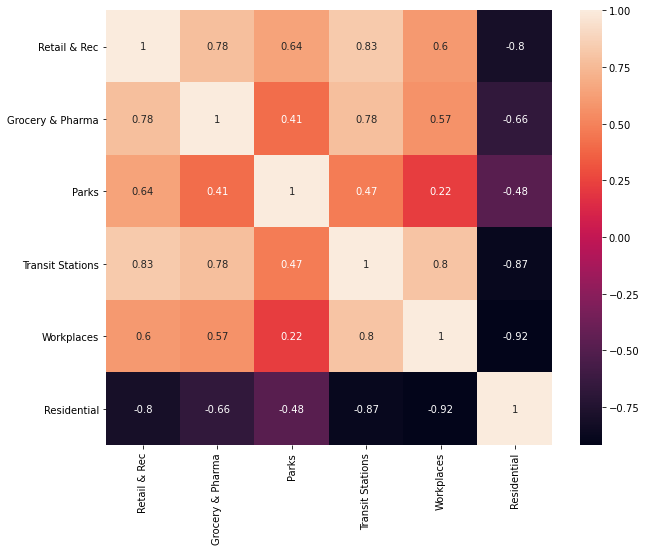

In [15]:
#Using seaborn show the correlations on a heatmap
fig, ax = plt.subplots(figsize=(10,8))       
sns.heatmap(corr, annot=True, ax=ax)
plt.show()

From the above table and heatmap we can tell which categories are closely correlated (>0.7), which are inversely correlated (<-0.7) and which have no correlation.  
- Most closely correlated:  
>-- Retail&Rec AND Transit Stations = 0.83  
>-- Transit Stations AND Workplaces = 0.8  
>-- Retail&Rec AND Grocery&Pharma = 0.78  
>-- Grocery&Pharma AND Transit Stations = 0.78  

- Inversely Correlated:  
>-- Residential AND Workplaces = -0.92  
>-- Residential AND Transit Stations = -0.87  
>-- Residential AND Reatil&Rec = -0.8  

- Least Correlation:
>-- Parks AND Workplaces = 0.22  

Now let us graph some of these and calculate their cosine similarity

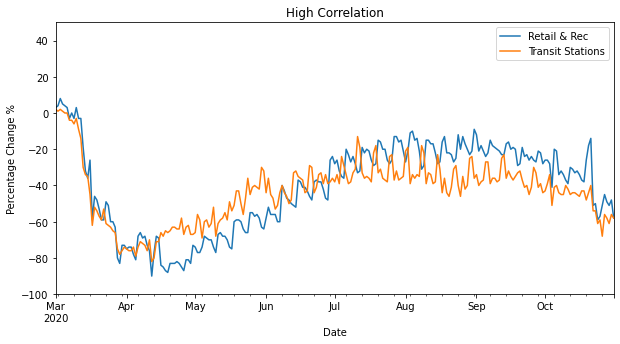

In [16]:
graphplot(ireland[['Retail & Rec','Transit Stations']],"High Correlation","Date","Percentage Change %",-100,50)

In [17]:
#Note that spatial.distance.cosine computes the distance, and not the similarity. 
#So, you must subtract the value from 1 to get the similarity.
result = 1 - spatial.distance.cosine(ireland['Retail & Rec'].values, ireland['Transit Stations'].values)
print("The cosine similarity for Retail&Rec AND Transit Stations is: ",round(result,2))

The cosine similarity for Retail&Rec AND Transit Stations is:  0.96


From the graph we can see how closely correlated these two cateogries are as they nearly follow each other perfectly at all times. This is mainly because in order to get to retail and recreational locations people usually have to use public transport thus a correlated increase in transit stations mobility. It is not only correlated but it is also nearly an identical % change. It is worth noting that there are weekly local peaks for transit and troughs for retail during the weekends thus they criss-cross. Transit moves closer to normal levels on weekends as the levels were low already low pre-pandemic same as post-pandemic, while Retail had high mobility on weekends during normal time thus the trend drops away from the baseline post-pandemic.  
The high cosine similarity result of 0.96 reiterates this strong relationship in both terms of pattern and percentage change via a similarity measure.

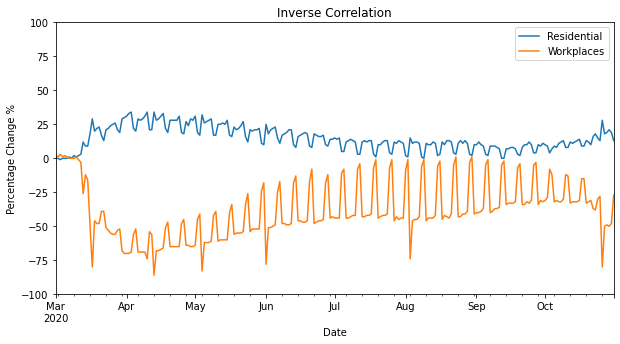

In [18]:
graphplot(ireland[['Residential','Workplaces']],"Inverse Correlation","Date","Percentage Change %",-100,100)

In [19]:
result = 1 - spatial.distance.cosine(ireland['Residential'].values, ireland['Workplaces'].values)
print("The cosine similarity for Redisdential AND Workplaces is: ",round(result,2))

The cosine similarity for Redisdential AND Workplaces is:  -0.98


Inversly correlated as when less people go to work more stay at home and vice versa. We can also see during lockdowns less mobility at workspaces is faced with increased mobility at residential locations. We can see that during weekends both tend towards the baseline as during the weekends before COVID-19 the same still happened with workplaces mobility being low and residential mobility high.  
The cosine similarity is extremely negative at -0.98 which hows how strong this inverse correlation relationship is.

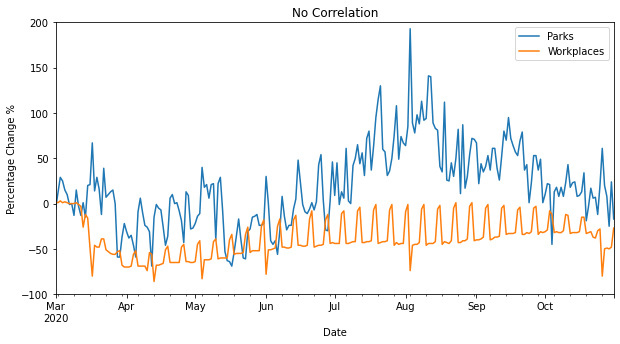

In [20]:
graphplot(ireland[['Parks','Workplaces']],"No Correlation","Date","Percentage Change %",-100,200)

In [21]:
result = 1 - spatial.distance.cosine(ireland['Parks'].values, ireland['Workplaces'].values)
print("The cosine similarity for Parks AND Workplaces is: ",round(result,2))

The cosine similarity for Parks AND Workplaces is:  -0.25


There is no clear relationship or correlation whatsoever between these two location categories. This is because of many possible reasons one of which is the seasonality and weather dependence of parks mobility compared to the constant,  invariable workplaces mobility. In addition, on public holidays parks recieve more mobility while workplaces are the opposite with less mobility. While both of them move in the same direction on weekends. Thus this leaves us with no clear relationship.  
The reason the correlation is not 0 is due to the random chance that both drop slightly during the lockdowns as they happened during bad weather (March and October).  
The near 0 cosine similarity value reinforces this information that both in terms of pattern and even values there is no similarity.

**Comparison General Trends**   
Graph raw, rolling 7 and rolling 30 in 3 graphs

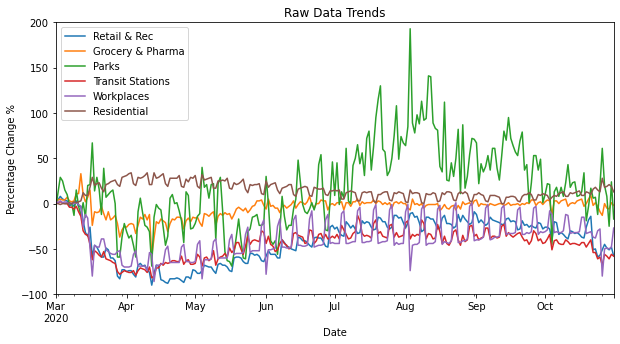

In [22]:
graphplot(ireland,"Raw Data Trends","Date","Percentage Change %",-100,200)

The raw data trend here is hard to compare due to the outliers and heavy fluctutations on weekends / holidays. 
Yet we can still see:  
- Parks are the exception in terms of the amount of % change from the baseline reaching nearly 200%.

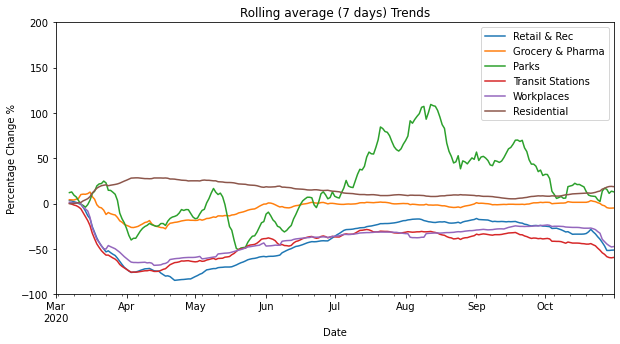

In [23]:
graphplot(ireland.rolling(7).mean(),"Rolling average (7 days) Trends","Date","Percentage Change %",-100,200)

Here we can see the trends more clearly as the 7 day mean rolling average nerfs outliers. This still supports what we saw earlier:  
- Parks fluctuate a lot even after applying the rolling average which may be due to seasonality and holidays as well as dependency on weather. Each local peak correlates with a public holiday.
- There seems to be an inversely correlated relationship between Grocery&Pharma and Residential as we can see clearly from their trend lines.
- Retail, Transit and Workplaces seem to be correlated and change by the same value as their trend lines go together.

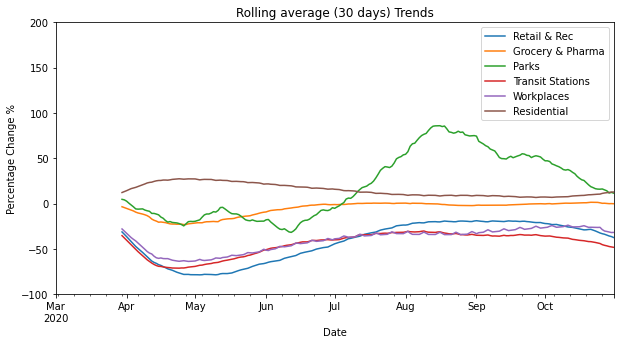

In [24]:
graphplot(ireland.rolling(30).mean(),"Rolling average (30 days) Trends","Date","Percentage Change %",-100,200)

The 30 day rolling average smoothens the trends more. We can cearly see that:  
- Grocery&Pharma is close to being inversely correlated to  residential.
- Transit stations is near prefectly correlated to workplaces with almost the exact same percentage changes. Retail&Rec is very closely correlated to both of them. They all follow a downward trend during the first and second lockdowns.
- Workplaces tend upwards towards the baseline each weekend due to weekends having a low mobility at workplaces even before COVID-19.
- Parks are clearly seasonal and still fluctuates a lot even after the smoothening due to holidays and unpredictable weather conditions.

**<font color= blue>Part (d): Suggest explanations for any differences that you have observed between the
time series for the location categories. </font>**  
List of differences noted:  
*Correlation differences*  
>- Residential location category is inversely correlated to all the other categories excpet parks. This is due to the lockdowns which forced people to stay at home and around their residential areas. People still went to parks as it was allowed during lockdowns thus they are not inversely correlated. However retail, workplaces, public transport closures during lockdowns resulted in this inverse relationship.
>- Following on from the previous point, Retail&Rec, Transit, Workplaces and Grocery&Pharma are all closely correlated as they all suffered less mobility at the same times due to closures during different lockdowns/restrictions. 
>- The most closely correlated are Retail&Rec and Transit stations (*as shown below by the trend line*) as the most people use public transport normally to get to and from retail shops. Thus when retail & rec close people do not go to transit stations. In addition, not only do these two categories correlate in pattern but also in values as can be seen by the *joint plot below* through the similar values on the axis and histograms. The plot also displays the line of best fit and shows how small the margin of error is which is the shaded part.
>- The least correlation is between parks and workplaces locations due to them having almost nothing in common. People go to parks regardless if they go to work or not as many people go on daily park walks.



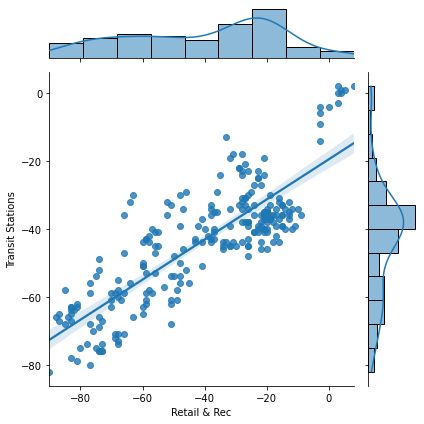

In [25]:
seabornplot(ireland,ireland["Retail & Rec"],ireland["Transit Stations"],"jointplot")

*Other differences*  
>- Grocery&Pharma did not fluctuate too much due to them being essential goods that humans need to survive. In addition they are usually within close proximity of residential locations thus even during the lockdowns the drop is minimal.
>- On the other hand Parks locations had the most fluctuations due to multiple reasons including: Seasonality (During the summer parks get more people), Weather conditions (on warm/sunny days people like to go to parks) and public holidays (people go to parks when they are free specially when most indoor activity is closed).
>- Workplaces have reduced mobility and residential locations have increased mobility during the pandemic. However both tend towards the baseline on weekends as this is their "normal" before the virus as workplaces are shut on weekends.
>- Groceries and in turn Transit stations do tend to get more people on Saturdays as people have time to shop. These are minor peaks that are smoothened by rolling averages.
>- Public/Bank holidays cause huge drops in workplaces from the baseline as almost all of them shut. In contrast they cause local peaks in park locations as people like to go outdoors on holidays.

***<font color= RED> ITALY </font>***
## Italy

**<font color= blue>Part (a): Construct a set of time series that represent the mobility patterns for the different location categories </font>**
>- Plot a subplot with a time series for each location category

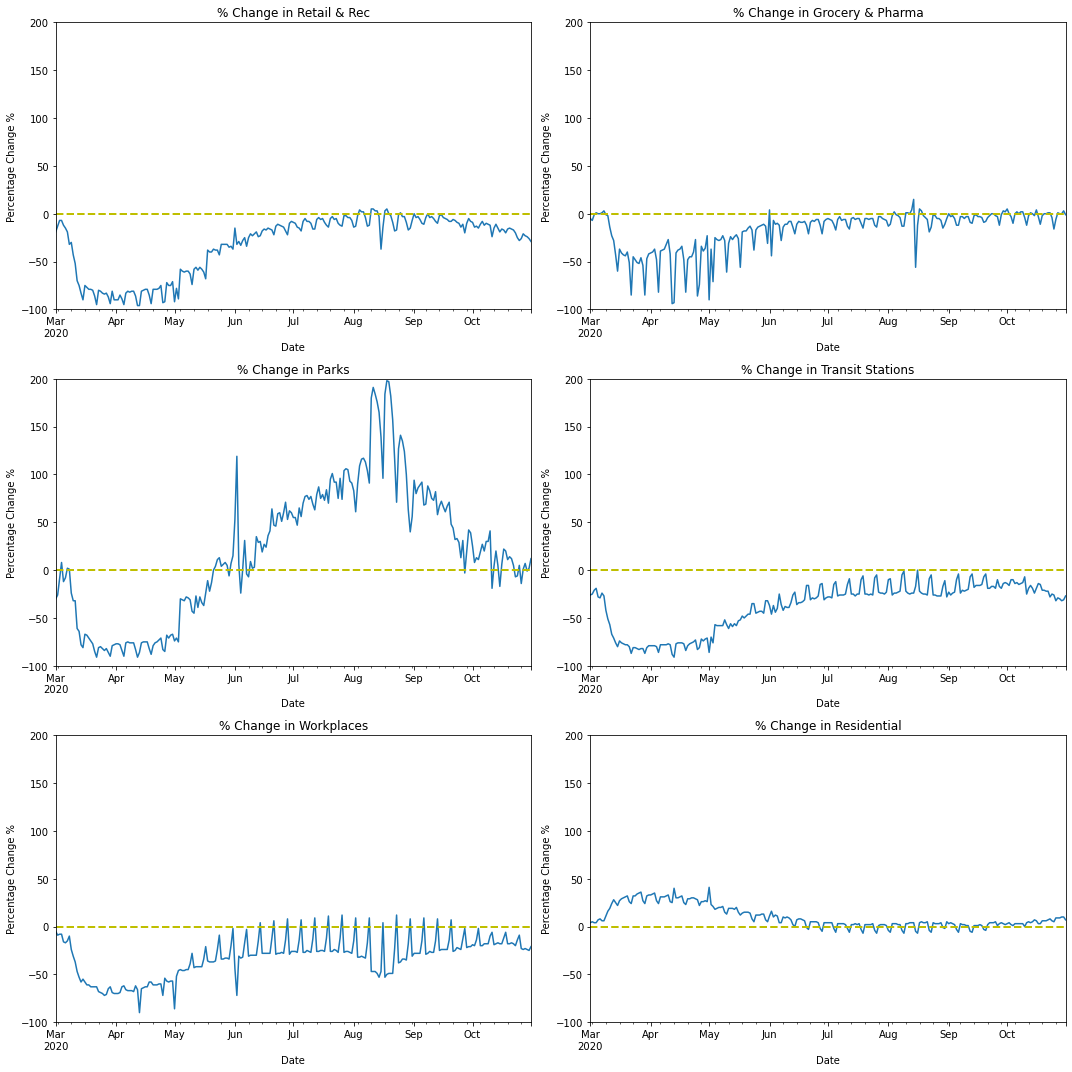

In [26]:
#ITALY
graphsubs(italy)

**<font color= blue>Part (b): Characterise and visualise each of these time series </font>**
>- Visual inspection
>- Identification of peaks and troughs
>- Compute summary statistics
>- Identify general trends via smoothing and grouping
>- Conclude the summary of each graph and why it acted that way

**Visual Inspection**  
1) *Retail & Recreation:*
- Nearly fully below the baseline
- Major and steep drop in mid-March and a slow return to the normal baseline by the summer. A new downward trend may be starting in October. 
- A couple of outliers can be seen.

2) *Groceries & Pharmacies:*
- Major fluctuation until June then a relative normal activity around the baseline.
- One major outlier mid-August.

3) *Parks:*
- Huge drop to nearly -80% and stabilises there until May.
- From May there is an upward trend crossing the baseline which then becomes a downard trend from mid-suumer till October.
- Highest peaks amongst the series happen mid-summer.
- Major fluctuations throughout.

4) *Transit Stations:*
- Completely below the baseline
- Major Drop mid-March, followed by a steady increase from May into the summer. Signs of a new downward trend in October can be seen.
- Has a zigzag (up & down) pattern nearly weekly.

5) *Workplaces:*
- Nearly fully below the baseline with a huge drop in mid-March that continues till May.
- Has a zigzag (up & down) pattern nearly weekly from May onwards.
- Starts to stabilise near the baseline from mid-September.

6) *Residential Areas:*
- Nearly fully above the baseline, the only category to have only an increase in usage at all points.
- Weekly cycles can be noted
- Overall trend increase during March-May then returns to normal levels. There seems to be an upward trend building up  in October.

**After the above quick overview of the simple time series let us conduct some more indepth characterisations**

**Summary Statistics**

In [27]:
italy.describe()

,Retail & Rec,Grocery & Pharma,Parks,Transit Stations,Workplaces,Residential
count,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000
mean,-31.840816,-17.318367,19.551020,-37.624490,-32.318367,10.016327
std,30.834619,21.006748,70.202477,24.708585,21.094165,11.579365
min,-96.000000,-94.000000,-91.000000,-91.000000,-90.000000,-7.000000
25%,-59.000000,-27.000000,-31.000000,-57.000000,-47.000000,3.000000
50%,-17.000000,-10.000000,15.000000,-27.000000,-28.000000,5.000000
75%,-9.000000,-3.000000,71.000000,-21.000000,-19.000000,19.000000
max,5.000000,15.000000,198.000000,0.000000,12.000000,41.000000


From the above table we can see:
- There are 245 entries
- Retail, Groceries, Transit and Workplaces all have a negative mean change showing that they are being visited less overall since March
- Parks and Residential have a positive mean change telling us that they have been frequented more than usual since March
- We can see that the most negative change from baseline was in Retail & Recreation at -96%, however 4 other categories have their low in the -90s% showing how much mobility all the locations lost except Residential.
- We can see that the most positive change from baseline was in Parks at 198%, non of the other locations even came close.
- The location that varied the most and had the largest standard deviation is Parks and the least being Residential at only 11%, which could mean there was not much change in Residential activity before and after the pandemic.

**Identify Troughs and Peaks**

In [28]:
print('Retail & Recreation % change')
print('\n********TROUGHS*******\n',italy["Retail & Rec"].sort_values().head(2))
print('\n*****POST AUGUST TROUGHS****\n',italy.loc['2020-08-01'::]["Retail & Rec"].sort_values().head(2))

Retail & Recreation % change

********TROUGHS*******
 Date
2020-04-12   -96.0
2020-04-13   -96.0
Name: Retail & Rec, dtype: float64

*****POST AUGUST TROUGHS****
 Date
2020-08-15   -37.0
2020-10-31   -29.0
Name: Retail & Rec, dtype: float64


- From above we can see that overall the 2 most significat troughs in retail were on the Easter weekend. This is expected as Italy was amidst the strictist national lockdown as well as it being a public holidays during which retail usually closes. This explains the eye-opening -96% change in mobility.
- In the second table the 2 largest troughs since August 1st are shown. This is worth looking at seperately as overall the troughs would all be in the first national lockdown time. Here we can see that the first trough falls on the 15th of August which is a holiday in Italy and the second trough is on the 31st of October which is Halloween and just after the start of new restrictions. Thus this shows how retail drops mostly during public holidays and lockdowns.

In [29]:
print('Grocery & Pharmacies % change')
print('\n********PEAKS*******\n',italy["Grocery & Pharma"].sort_values(ascending=False).head(1))
print('\n********TROUGHS*******\n',italy["Grocery & Pharma"].sort_values().head(3))

Grocery & Pharmacies % change

********PEAKS*******
 Date
2020-08-14    15.0
Name: Grocery & Pharma, dtype: float64

********TROUGHS*******
 Date
2020-04-12   -94.0
2020-04-13   -93.0
2020-05-01   -90.0
Name: Grocery & Pharma, dtype: float64


- Mobility peaked at Grocery&Pharamcies locations in Italy on the 14th of August. This is likely because most Italians were buying groceries to prepare food the next day which is a major public holiday in Italy. In addition lockdown restrictions were lenient allowing more mobility.
- The troughs at this location were on public holidays, most significantly the holidays that happened during lockdown such as Easter(12/13 of April) and Italian Labour Day (1st of May). This is because people prepare groceries the day before for these holidays and shops operate shorter hours.

In [30]:
print('Workplaces % change')
print('\n********PEAKS*******\n',italy["Workplaces"].sort_values(ascending=False).head(5))
print('\n********TROUGHS*******\n',italy["Workplaces"].sort_values().head(5))

Workplaces % change

********PEAKS*******
 Date
2020-08-23    12.0
2020-07-26    12.0
2020-07-19    11.0
2020-07-12     9.0
2020-09-06     9.0
Name: Workplaces, dtype: float64

********TROUGHS*******
 Date
2020-04-13   -90.0
2020-05-01   -86.0
2020-06-02   -72.0
2020-03-26   -72.0
2020-04-25   -72.0
Name: Workplaces, dtype: float64


- Note that all five of the peaks are on Sundays during the summer. Such days usually have low mobility at workplaces before the pandemic. After the lockdown people might have had to work more thus the slight increase above the baseline.
- The three main troughs all lie on public holidays during which all workplaces shut thus the major drop from the baseline. The remainder 2 are during the major Italian lockdown which closed down nearly everything.

In [31]:
print('Parks % change')
print('\n********PEAKS*******\n',italy["Parks"].sort_values(ascending=False).head(20))

Parks % change

********PEAKS*******
 Date
2020-08-18    198.0
2020-08-19    197.0
2020-08-11    191.0
2020-08-17    184.0
2020-08-12    184.0
2020-08-20    182.0
2020-08-10    180.0
2020-08-13    176.0
2020-08-14    165.0
2020-08-21    157.0
2020-08-25    141.0
2020-08-15    139.0
2020-08-26    135.0
2020-08-24    127.0
2020-08-27    124.0
2020-06-02    119.0
2020-08-06    117.0
2020-08-22    116.0
2020-08-05    116.0
2020-08-07    113.0
Name: Parks, dtype: float64


- All but one peaks at parks locations are during August. This is because of the lenient restrictions but more importantly the hot summer weather that encourages outdoor activity. That is why we see percentage changes up to 198%
- The one day outside August is the 2nd of June which is republic day, an Italian public holiday. In retrospect, weather has the most effect on parks mobility followed by public holidays.

In [32]:
print('Residential % change')
print('\n********PEAKS*******\n',italy["Residential"].sort_values(ascending=False).head(5))

Residential % change

********PEAKS*******
 Date
2020-05-01    41.0
2020-04-13    40.0
2020-03-27    36.0
2020-04-03    35.0
2020-03-26    35.0
Name: Residential, dtype: float64


- As expected all peaks of commuting mobility in residential locations are during the first strict Italian lockdown as people needed permits to leave their houses. 
- Another aspect is public holidays like Easter during which people like to stay at home with family.

**Identify General Trends**   
Done using moving averages with different intervals to smooth the graphs

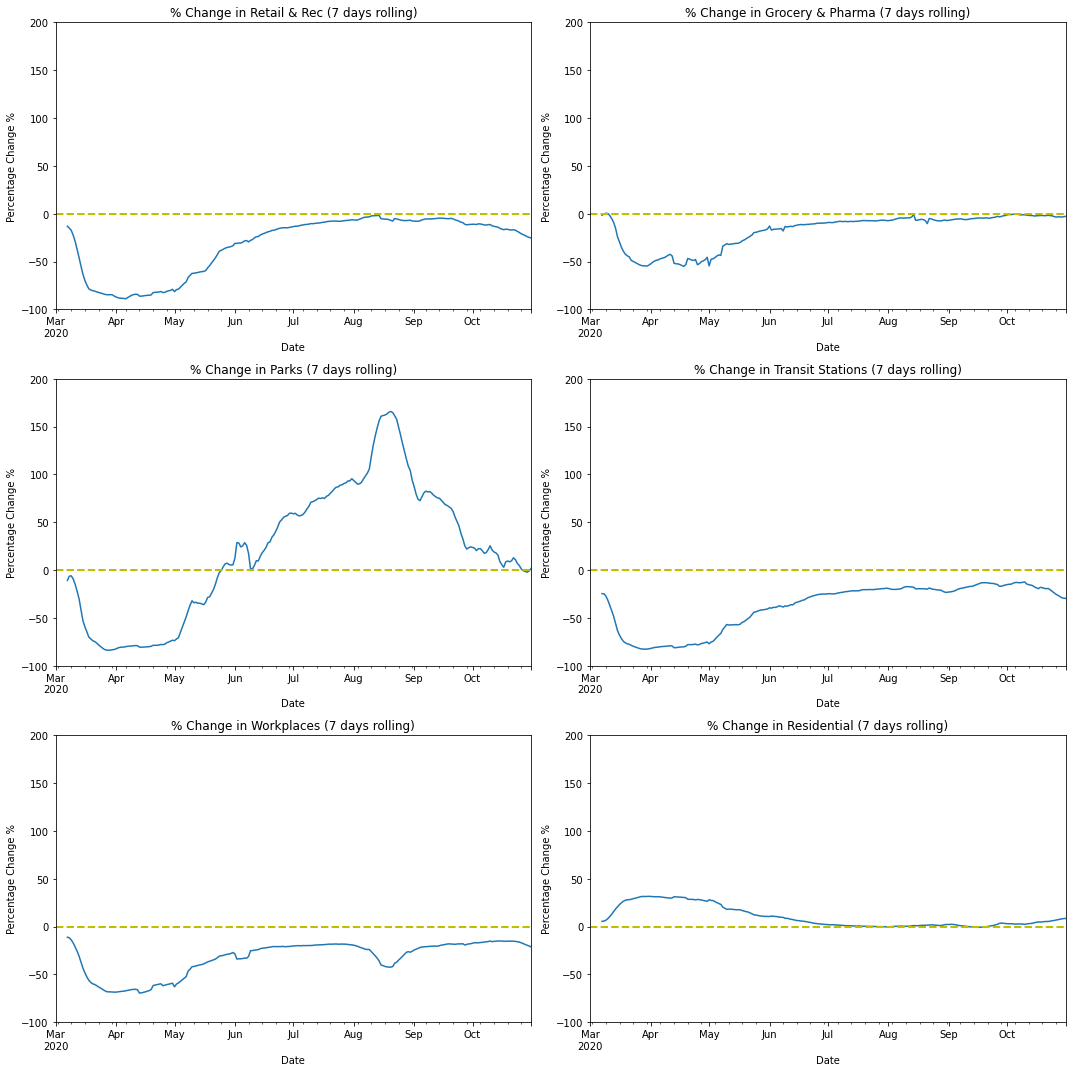

In [33]:
graphsubs(italy,7)

General Trends at 7 day rolling mean:
- *Retail & Rec:*  
Steep drop during March and stabilises at a -80% level until May. In May starts a slow and steady return to the normal baseline level which is achieved by August. Some stability near the baseline then a downward trend starts in October. The weekends effect is smoothened out.
- *Grocery & Pharma:*  
Major drop in March that remains till May with some outlier local peaks and troughs possibly due to holidays. From May a steady rise towards the baseline occurs. The baseline is reached and the trend stabilises there by August. There are a couple of outliers again probably due to holidays. The weekend effect has been smoothened out.
- *Parks:*  
Extremely high variance which can be accredited to weather conditions (seasonality). Peaks throughout August and drops after that. Some local peaks correlate to bank holidays.
- *Transit Stations:*  
Sharp drop during March due to full lockdown, then slowly recovers from May. It never reaches normal baseline levels and by October it is on a downward trend likely due to the new restrictions.
- *Workplaces:*  
Significant drop from March till April then slow but irregular recovery throughout the summer. Recovery did not reach the baseline. A downward trend may be starting at the end of October. Significant troughs can be seen around public holidays such as mid-August. 
- *Residential:*  
Quite regular and stable realtive to other categories. Peak up to 30% increase from baseline during the full lockdown (March-May) due to people needing a permit to leave their houses. Starting from the summer a normal trend can be seen very close to the baseline. An upward trend can be noticed at the end of October due to new restrictions imposed in Italy after a new surge in cases.

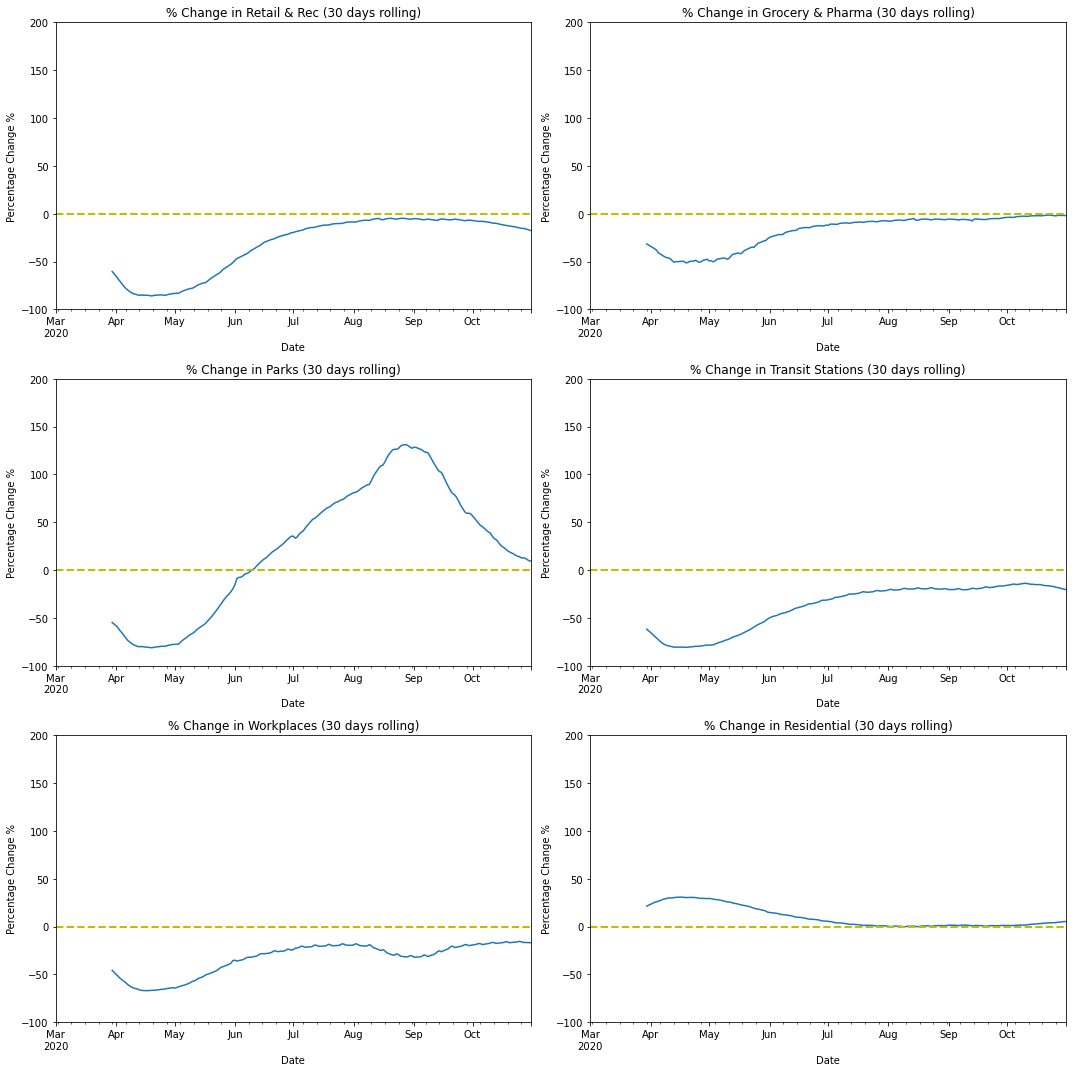

In [34]:
graphsubs(italy,30)

General Trends at 30 day rolling mean:
- *Retail & Rec:*  
A much smoother trend can be seen with the effect of outliers such as holidays removed. A dip from March till May can be seen which then reverses its direction upwards but at a smaller slope thus taking longer to recover. During the summer it nearly reaches the baseline but then falls again in October due to the new restrictions. If you look closely a few tiny bumps can be seen signifying a drop on weekends.
- *Grocery & Pharma:*  
A general trend of grocery & pharma mobility drops during the full lockdown to about -50% due to people leaving to get their groceries at specified times. The trend then returns to near the normal baseline levels from July. Small bumps can be seen due to less shopping being done on weekends.
- *Parks:*  
Trend reaches a trough in April due to the full lockdown not allowing people out of their houses and due to seasonality. The trend then take an upward slope starting in May to cross the baseline and reach up to 150% change during August due to lenient restrictions and summer weather. This then drops after the summer ends due to seasonality and new restrictions in October. Some bumps can be seen correlating to public holidays.
- *Transit Stations:*  
Very smooth trend with a big trough during the first lockdown in March-May. During the summer the line rises towards the baseline but never reaches it as it drops again in October due to a second surge in cases and new restrictions. Some bumps during the summer most likely relating to weekends having more transit mobility.
- *Workplaces:*  
Effect of weekends highly nerfed even though weekly small peaks can still be seen which signal a change towards the baseline during the weekends at empty workplaces. The general trend faced the largest trough in April amidst the full national lockdown. Another minor trough can be seen during the summer likely due to seasonality and people taking holidays in the hot summer. Apart from the first national lockdown, working from home levels seem to be low as the trend stabilised at around -10%/-20% below the baseline.
- *Residential:*  
The smoothest general trend with the weekend effects nerfed. A smooth peak can be seen during the full lockdown (March-May) and then a smooth return to normal baseline levels can be seen and achieved by July. A new smooth peak is building up due to the new restrictions in October.

###### **Summary of the Visualisation and Characterisation**  
Effects of Full Lockdown (March-May)   
>- All location categories except residential suffered from less commuting mobility due to the full Italian lockdown. This lockdown was one of tightest in Europe with residents needing permits to leave their houses. Retail, parks, transit stations and workplaces suffered from percetage changes as low as -80% while groceries fluctuated, averaging -50% in that period.
>- However, the residential category had increased mobility by up to 30% during the full lockdown due to people being forced to stay at home.

Effects of October Restrictions
>- Towards the end of October the Italian government imposed new restrictions due to the second wave of the virus. The restrictions however are more lenient than those of the full lockdown.
>- Retail and Transit stations categories are immediately affected by the restrictions and head into significant negative percentage changes similar to the full lockdown. This is due to retail being a non-essential sector.
>- In Workplaces we see a hint of a downward trend but it does not seem as steep as the full lockdown as many more businesses remain opened this time.
>- Groceries&Pharma are not affected at all by the new restrictions and the trend continues around the baseline. This is because no restrictions are imposed on grocery shopping and shops and there was no panic buying.
>- Residential locations have a slight upward trend as a few more people work from home and stay at home. This is the inverse of workplaces.

Effects of Pubic holidays  
>- Workplaces mobility accompanied with Groceries&Pharama drop the most during public/bank holidys in Italy as their dates are not fixed thus are being compared to the baseline of a regular working day.
>- Parks mobility increase the most during holidays due to people having free time to go outdoors.
>- Holidays may cause a small local peak in retail & rec on the holiday or just before.
>- Residential areas do experience a slgiht peak during public holidays as some people stay at home with family.

Effects of Weekends  
>- Most significant at the workplaces location category as during weekends workplaces are usually empty anyway thus the trend returns to the baseline every weekend.
>- A similar effect can be felt less clearly on the residential category as this location usually gets more mobility on weekends thus we see a drop towards the baseline every weekend.
>- It could also be argued that parks get more mobility during weekends but thats hard to see as seasonality is the main factor.
>- Finally groceries do see very small drops in their trends on weekends as it appears that more Italians now do their shopping over the week rather than doing it all on the weekend like pre-pandemic as they have more free time now. This is removed by smoothining.

**<font color= blue>Part (c): Compare and contrast how the series for the different location categories have
changed over time for the country. To what extent are these series correlated
with one another. </font>**
>- Visual comparison
>- Calculate the correlation / similarity
>- Comparison of general trends

**Visual Comparison**   
From part (b)  
Conducting a quick visual comparison between the different location categories graphed in part (b):
>- Retail, transit stations and to a lesser extent workplaces tend to follow the same trend at different percentage changes. However they move upwards/downwards together at the same time.
>- The above three are inversely correlated to residential locations. When the three have an downwards trend, residential has an upwards trend and vice-versa.
>- Groceries & Pharma did follow the same trend as the three during the full lockdown with smaller percentage changes, but it then continued to fluctuate around baseline and were not affected by the October restrictions.
>- Parks do not share any common trends with another location category most likely due to the affects of seasonality and weather on it.

**Similarity Calculations**   
- Using pearson correlation  
- Plots  
- Confirm using cosine similarity which is quick and excellent at finiding similarities. This technique does not centre the data. It uses the cosine angle from the origin to measure.
- The Pearson correlation normalizes the values of the vectors to their arithmetic mean. In geometrical terms, this means that the origin of the vector space is located in the middle of the set, while the cosine constructs the vector space from an origin where all vectors have a value of zero.

In [35]:
#Find the pearson's correlation between all the different categories
corr=italy.corr(method ='pearson') 
corr

,Retail & Rec,Grocery & Pharma,Parks,Transit Stations,Workplaces,Residential
Retail & Rec,1.000000,0.886882,0.875646,0.940353,0.731687,-0.916431
Grocery & Pharma,0.886882,1.000000,0.683425,0.817997,0.644833,-0.735896
Parks,0.875646,0.683425,1.000000,0.798615,0.488860,-0.816668
Transit Stations,0.940353,0.817997,0.798615,1.000000,0.872103,-0.970158
Workplaces,0.731687,0.644833,0.488860,0.872103,1.000000,-0.878034
Residential,-0.916431,-0.735896,-0.816668,-0.970158,-0.878034,1.000000


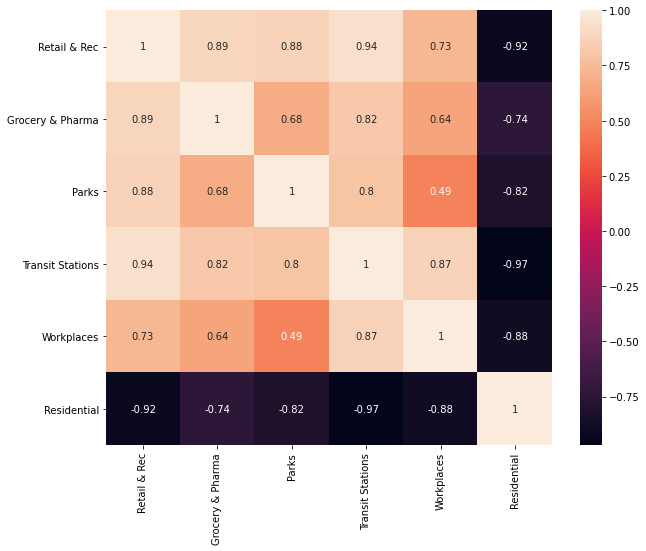

In [36]:
#Using seaborn show the correlations on a heatmap
fig, ax = plt.subplots(figsize=(10,8))       
sns.heatmap(corr, annot=True, ax=ax)
plt.show()

From the above table and heatmap we can tell which categories are closely correlated (>0.7), which are inversely correlated (<-0.7) and which have no correlation.  
- Most closely correlated:  
>-- Retail&Rec AND Transit Stations = 0.94  
>-- Retail&Rec AND Grocery&Pharma = 0.89  
>-- Retail&Rec AND Parks = 0.88  
>-- Transit Stations AND Workplaces = 0.87     

- Inversely Correlated:  
>-- Residential AND Transit Stations = -0.97    
>-- Residential AND Reatil&Rec = -0.92  
>-- Residential AND Workplaces = -0.88   

- Least Correlation:
>-- Parks AND Workplaces = 0.49  

Now let us graph some of these and calculate their cosine similarity

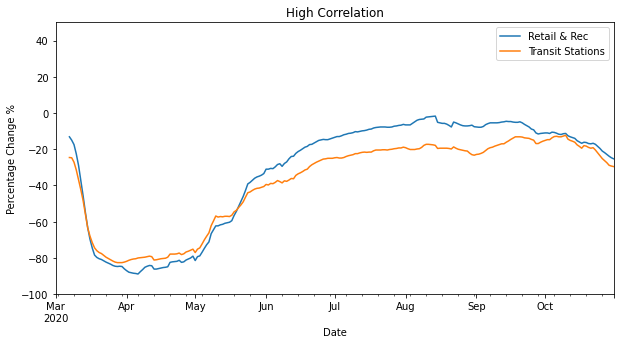

In [37]:
graphplot(italy[['Retail & Rec','Transit Stations']].rolling(7).mean(),"High Correlation","Date","Percentage Change %",-100,50)

In [38]:
#Note that spatial.distance.cosine computes the distance, and not the similarity. 
#So, you must subtract the value from 1 to get the similarity.
result = 1 - spatial.distance.cosine(italy['Retail & Rec'].values, italy['Transit Stations'].values)
print("The cosine similarity for Retail&Rec AND Transit Stations is: ",round(result,2))

The cosine similarity for Retail&Rec AND Transit Stations is:  0.96


The above graph is a 7 day rolling average to remove the effects of weekend peaks/drops.
From the graph we can see how closely correlated these two cateogries are as they nearly follow each other perfectly at all times. This is mainly because in order to get to retail and recreational locations people usually have to use public transport thus a correlated increase in transit stations mobility. It is not only correlated but it is also nearly an identical % change. It is worth noting that the difference is on weekends Retail has small drops while transit does not.  
The high cosine similarity result of 0.96 reiterates this strong relationship and tells us that not only are the patterns correlated but so are the values of percentage changes.

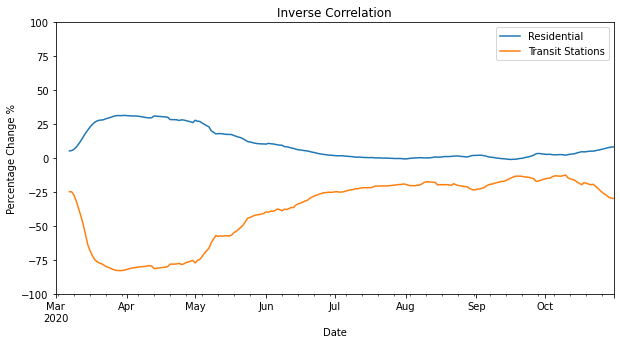

In [39]:
graphplot(italy[['Residential','Transit Stations']].rolling(7).mean(),"Inverse Correlation","Date","Percentage Change %",-100,100)

In [40]:
result = 1 - spatial.distance.cosine(italy['Residential'].values, italy['Transit Stations'].values)
print("The cosine similarity for Redisdential AND Transit Stations is: ",round(result,2))

The cosine similarity for Redisdential AND Transit Stations is:  -0.95


The above graph is a 7 day rolling average to remove the effects of weekend peaks/drops.  
They are inversly correlated as when more people stay at home less people use public transport and vice-versa. We can also see during lockdowns that there is less mobility at transit stations while there is increased mobility at residential locations. We can see that during weekends both tend towards the baseline as during the weekends before COVID-19 the same still happened with transit stations mobility being low and residential mobility high.
The cosine similarity is extremely negative at -0.95 which shows how strong this inverse correlation relationship is not only in pattern but values as well.

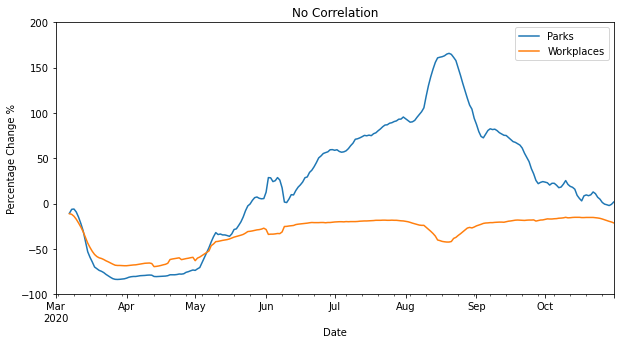

In [41]:
graphplot(italy[['Parks','Workplaces']].rolling(7).mean(),"No Correlation","Date","Percentage Change %",-100,200)

In [42]:
result = 1 - spatial.distance.cosine(italy['Parks'].values, italy['Workplaces'].values)
print("The cosine similarity for Parks AND Workplaces is: ",round(result,2))

The cosine similarity for Parks AND Workplaces is:  0.03


The above graph is a 7 day rolling average to nerf the effects of weekend peaks/drops.  
There is no clear relationship or correlation whatsoever between these two location categories. This is because of many possible reasons one of which is the seasonality and weather dependence of parks mobility compared to the constant, relatively-invariable workplaces mobility. In addition, on public holidays parks recieve more mobility while workplaces are the opposite with less mobility. While both of them move in the same direction on weekends. Thus this leaves us with no clear relationship.
The reason the correlation is not 0 is due to the random chance that both drop slightly during the full lockdown as it happened during bad weather (March/April).
The near 0 cosine similarity value reinforces this information that neither pattern or values are similar.

**Comparing General Trends**   
Graph raw, rolling 7 and rolling 30 in 3 graphs

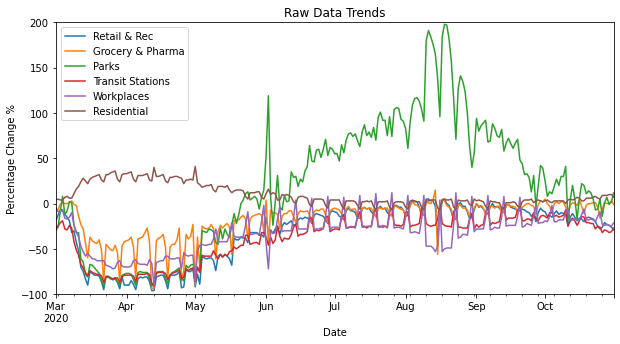

In [43]:
graphplot(italy,"Raw Data Trends","Date","Percentage Change %",-100,200)

The raw data category trends here are hard to compare due to the outliers and heavy fluctutations on weekends / holidays. Yet we can still see:

- Parks are the exception in terms of the amount of % change from the baseline reaching nearly 200%.
- Residential locations is the only category that had a positive % change from the baseline during the full lockdown in March-May.

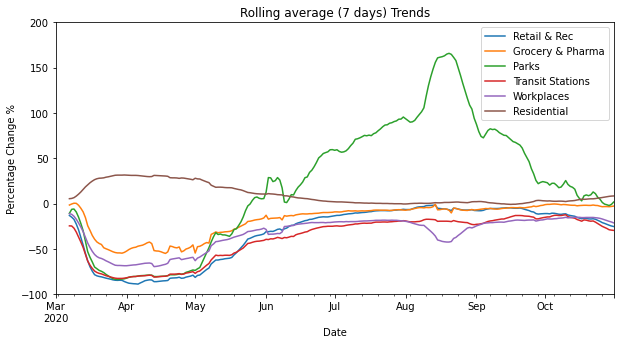

In [44]:
graphplot(italy.rolling(7).mean(),"Rolling average (7 days) Trends","Date","Percentage Change %",-100,200)

Here we can see the trends more clearly as the 7 day mean rolling average nerfs outliers. This still supports what we saw earlier and adds:

- Parks fluctuate a lot even after applying the rolling average which may be due to seasonality and holidays as well as dependency on weather. Multiple local peaks correlate with a public holiday.
- There seems to be an inversely correlated relationship between Residential and all other categories (except parks) as we can see clearly from their trend lines.
- Retail, Transit and to a lesser extent Workplaces seem to be correlated and change by the same value as their trend lines go together.

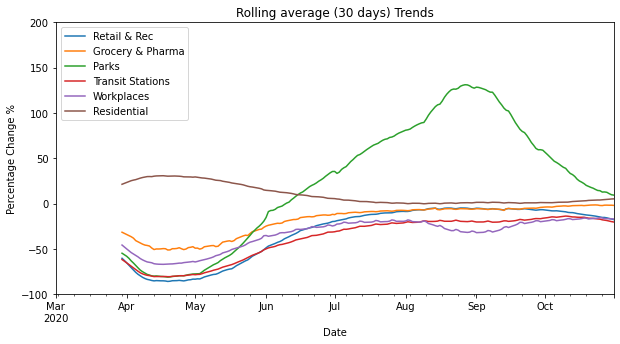

In [45]:
graphplot(italy.rolling(30).mean(),"Rolling average (30 days) Trends","Date","Percentage Change %",-100,200)

The 30 day rolling average smoothens the trends more. We can cearly see that:

- Transit stations, and slightly less Retail&Rec, are close to being perfectly inversely correlated to residential.
- Transit stations is near prefectly correlated to Retail&Rec with almost the exact same percentage changes. Retail&Rec is very closely correlated to both of them. They all follow a downward trend during the first and second lockdowns.
- Workplaces tend upwards towards the baseline each weekend due to weekends having a low mobility at workplaces even before COVID-19.
- Parks are clearly seasonal and still fluctuates a lot even after the smoothening due to holidays and unpredictable weather conditions.
- All categories fall steeply below the baseline during the full lockdown (March-May) apart from residential which goes above it. Then all categories except Parks tend towards a smooth merge with their baseline over the summer.

**<font color= blue>Part (d): Suggest explanations for any differences that you have observed between the
time series for the location categories. </font>**  
List of differences noted:  
*Correlation differences*  
>- Residential location category is inversely correlated to all the other categories during the full lockdown. This is due to people not being allowed out of their homes nearly at all.
>- Beyond May, the residential location category is still inversely correlated to all other categories except parks. This is because when shops, workplaces, transport opened up, less people stayed at home thus everything going back to the normal baseline.
>- Following on from the previous point, Retail&Rec, Transit, Workplaces and Grocery&Pharma are all closely correlated as they all suffered less mobility at the same times due to closures during different lockdowns/restrictions. The most closely correlated are Retail&Rec and Transit stations, as in order to go to retail locations people use public transport. Thus when retail&rec locations are closed people do not go to transit stations.
>- The least correlation is between parks and workplaces locations due to them having almost nothing in common. People go to parks regardless if they go to work or not as many people go on daily park walks. This lack of relationship is displayed in the distribution plot below. There is no clear shape for the data and the axis values are very different telling us that there is no correlation in pattern or similarity in values.



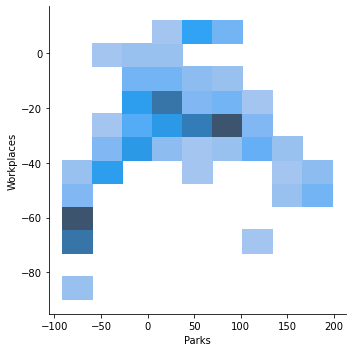

In [46]:
seabornplot(italy,italy["Parks"],italy["Workplaces"],"distplot")

*Other differences*  
>- Grocery&Pharma did not fluctuate or drop too much due to them being essential goods that humans need to survive. In addition they are usually within close proximity of residential locations thus even during the lockdown/restrictions the drop is minimal.
>- On the other hand Parks locations had the most fluctuations due to multiple reasons including: Seasonality (During the summer parks get more people), Weather conditions (on warm/sunny days people like to go to parks) and public holidays (more people go to parks when they are free specially when most indoor activity is closed).
>- Workplaces have reduced mobility and residential locations have increased mobility during the pandemic. However both tend towards the baseline on weekends as this is their "normal" before the virus as workplaces are shut on weekends and people are at home. 
>- Transit tends towards the normal baseline on weekends as pre-pandemic public transport had low traffic on weekends anway thus the pandemic levels during weekends are normal.
>- Public/Bank holidays cause huge drops in workplaces from the baseline as almost all of them shut.

***<font color= RED> SWEDEN </font>***
## Sweden

**<font color= blue>Part (a): Construct a set of time series that represent the mobility patterns for the different location categories </font>**
>- Plot a subplot with a time series for each location category

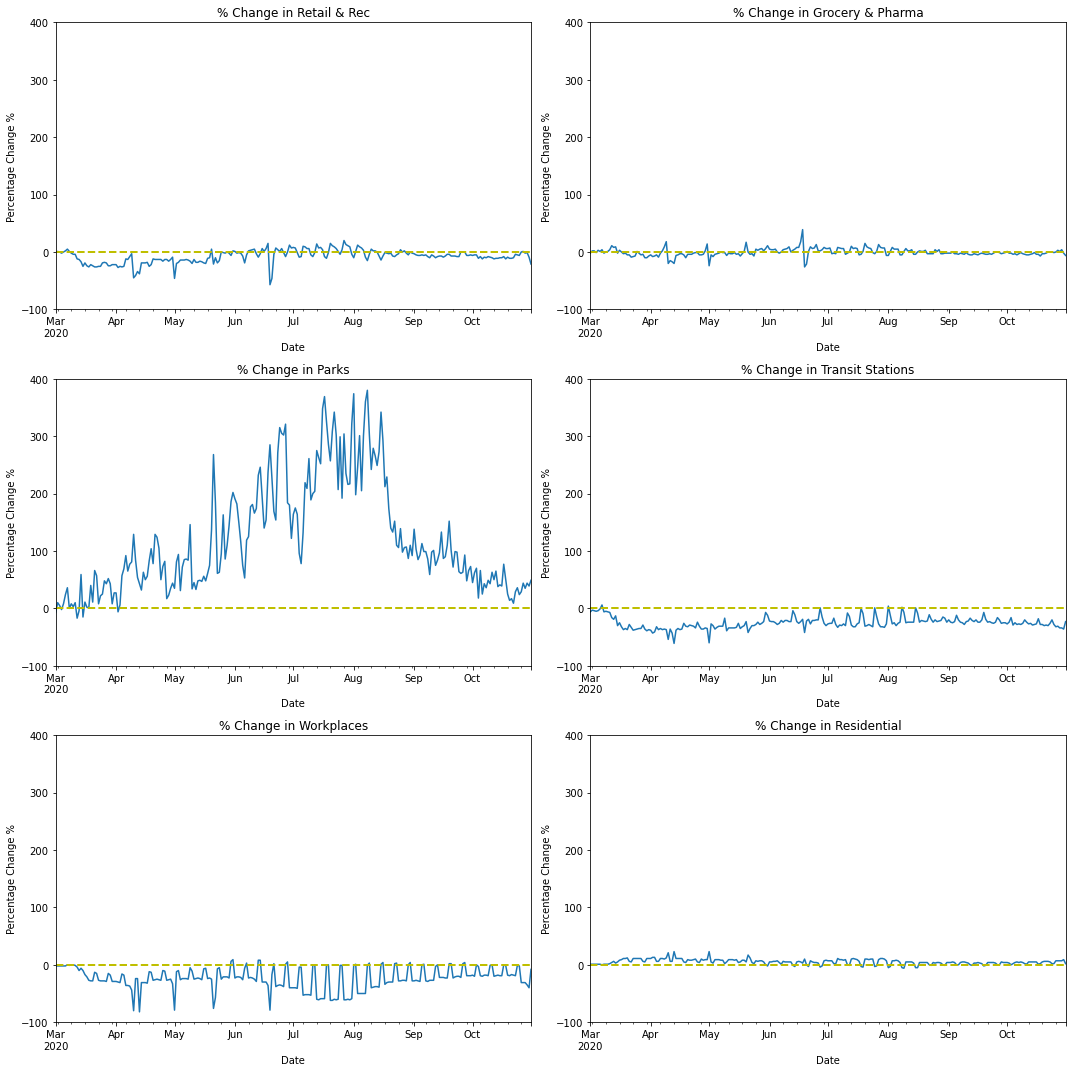

In [47]:
#SWEDEN
graphsubs(sweden)

**<font color= blue>Part (b): Characterise and visualise each of these time series </font>**
>- Visual inspection
>- Identification of peaks and troughs
>- Compute summary statistics
>- Identify general trends via smoothing and grouping
>- Conclude the summary of each graph and why it acted that way

**Visual Inspection**  
1) *Retail & Recreation:*
- Slight drop below the baseline during the first outbreak (March-May) with a couple major drops below the baseline
- From June onwards, nearly perfectly on the baseline with a few outliers. There seems to be a downward trend at the end of October.

2) *Groceries & Pharmacies:*
- Nearly no fFluctuation at all. Follows the normal baseline nearly perfectly
- A few outliers scattered likely due to holidays
- Some sort of a weekly patterns may be noticed

3) *Parks:*
- By far the most unstable
- Fluctuates a lot mostly above the baseline
- Highest peak amongst all the series happened mid-summer at outstanding percentage changes above 300%

4) *Transit Stations:*
- Completely just below the baseline
- Drop in March/April slightly larger, slight increase during the summer then seems to be going on a dowanward trend at the end of October
- Weekly local peaks can be noticed signifying returns to normal levels

5) *Workplaces:*
- Fully below the baseline
- Has a zigzag (up & down) pattern nearly weekly signifying returns to normal levels
- Overall trend relatively flat and stable below the baseline likely due to working from home

6) *Residential Areas:*
- Nearly full stable on the baseline except a slight increase from normal levels during the first virus wave(March-June)
- Weekly cycles can be noted signifying returns to normal levels on weekends
- A few outliers may be linked to public holidays

**After the above quick overview of the simple time series let us conduct some more indepth characterisations**

**Summary Statistics**

In [48]:
sweden.describe()

,Retail & Rec,Grocery & Pharma,Parks,Transit Stations,Workplaces,Residential
count,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000
mean,-7.673469,-0.395918,119.167347,-25.200000,-23.587755,5.248980
std,11.406763,6.724251,95.998125,10.215947,18.958255,4.481205
min,-57.000000,-26.000000,-17.000000,-61.000000,-82.000000,-6.000000
25%,-13.000000,-4.000000,47.000000,-31.000000,-31.000000,3.000000
50%,-7.000000,-2.000000,87.000000,-26.000000,-23.000000,5.000000
75%,0.000000,3.000000,181.000000,-21.000000,-8.000000,8.000000
max,20.000000,39.000000,380.000000,6.000000,9.000000,23.000000


From the above table we can see:
- There are 245 entries.
- Retail, Transit and Workplaces all have a negative mean change showing that they are being visited less overall since March.
- Park locations have a positive mean change telling us that they have been frequented more than usual since March.
- Residential and Grocery have near 0 means, this shows that since the Covid outbreak in March, these locations suffered minimal impact/percentage change in mobility.
- We can see that the most negative change from baseline was in Workplaces at -82%, showing how much mobility these locations lost, likely due to working from home measures.
- We can see that the most positive change from baseline by a lot was in Parks at 380%, non of the other locations even came close. This may be due to seasonal changes a part from Covid.
- The location that varied the most and had the largest standard deviation is Parks and the least being Residential at only 4%, which could mean there was not much change in Residential activity before and after the pandemic as it remaind stable. While the high standard deviation in Parks could signify a seasonal pattern.

**Identify Troughs and Peaks**

In [49]:
print('Retail & Recreation % change')
print('\n*********PEAKS********\n',sweden["Retail & Rec"].sort_values(ascending=False).head(5))
print('\n********TROUGHS*******\n',sweden["Retail & Rec"].sort_values().head(5))

Retail & Recreation % change

*********PEAKS********
 Date
2020-07-27    20.0
2020-07-20    15.0
2020-06-18    15.0
2020-07-13    14.0
2020-07-28    13.0
Name: Retail & Rec, dtype: float64

********TROUGHS*******
 Date
2020-06-19   -57.0
2020-06-20   -46.0
2020-05-01   -46.0
2020-04-10   -45.0
2020-04-11   -41.0
Name: Retail & Rec, dtype: float64


- From the above we can see that all the "peaks" of mobility around Retail&Rec locations are during mid-week (weekdays). This is expected as people have more time to go shopping mid-week now that they are working from home. In addition the weather is nicer in the summer to walk around. Thus the trend line rises above the normal baseline.
- All the troughs of mobility around Retail&Rec are on Public Holidays. These drops are quite sharp reaching over -50%. This is not a surprise as many retail shops shut on public holidays and people are less likely to shop on those days. These include Easter Weekend, Labour day and midsummer Eve.

In [50]:
print('Grocery & Pharmacies % change')
print('\n*********PEAKS********\n',sweden["Grocery & Pharma"].sort_values(ascending=False).head(4))
print('\n********TROUGHS*******\n',sweden["Grocery & Pharma"].sort_values().head(4))

Grocery & Pharmacies % change

*********PEAKS********
 Date
2020-06-18    39.0
2020-04-09    18.0
2020-06-17    18.0
2020-05-20    17.0
Name: Grocery & Pharma, dtype: float64

********TROUGHS*******
 Date
2020-06-19   -26.0
2020-05-01   -24.0
2020-06-20   -21.0
2020-04-13   -20.0
Name: Grocery & Pharma, dtype: float64


- We can see that mobility around Grocery&Pharma locations peaks above the normal baseline the day(s) before a holiday and then reaches the lowest troughs on the holiday day itself. This is because people go to buy groceries to prepare for the holiday meals and on the holiday itself people spend it with family not shopping and many shops close.
- The pandemic has not affected this category at all as demonstrated here.

In [51]:
print('Parks % change')
print('\n*********PEAKS********\n',sweden["Parks"].sort_values(ascending=False).head(3))
print('\n********TROUGHS*******\n',sweden["Parks"].sort_values().head(3))

Parks % change

*********PEAKS********
 Date
2020-08-08    380.0
2020-08-01    374.0
2020-07-17    369.0
Name: Parks, dtype: float64

********TROUGHS*******
 Date
2020-03-12   -17.0
2020-03-15   -15.0
2020-03-01    -7.0
Name: Parks, dtype: float64


- It is easy to note the main split here. All the peaks in percentage change in park locations mobility are during Sweden's two hottest months, July and August. On the other hand all the troughs are during March, one of the coldest months in Sweden.
- It is also worth noting that all the peaks occur on weekends, which is expected as people have more time to have trips to parks.
- Note the amount the peaks are at, they reach highs as much as 380% percentage change from the normal baseline. This could be attributed to Sweden's high diurnal temperature variation.
- The effect of the pandemic seems minimal. In addition, if it did have an affect, the seasonality makes it hard to see it as it is much more significant.

In [52]:
print('Transit Stations % change')
print('\n*********PEAKS********\n',sweden["Transit Stations"].sort_values(ascending=False).head(3))
print('\n********TROUGHS*******\n',sweden["Transit Stations"].sort_values().head(3))

Transit Stations % change

*********PEAKS********
 Date
2020-03-07    6.0
2020-08-01    4.0
2020-08-08    2.0
Name: Transit Stations, dtype: float64

********TROUGHS*******
 Date
2020-04-13   -61.0
2020-05-01   -60.0
2020-04-10   -54.0
Name: Transit Stations, dtype: float64


- "Peaks" in Transit stations mobility can be seen on weekends. Note that these are just peaks in the trend but their values are around the normal baseline level. This is expected as pre-pandemic the mobility around transit stations was low on weekends already, thus the low mobility post-pandemic is the same as the "normal" levels thus a move in the trend towards the baseline.
- All the troughs are on public/bank holidays which is expected as transit has reduced schedules and on some holidays like Easter people tend to prefer to spend time at home with family.
- The pandemic resulted in reduced public transport. This had an effect on weekdays as people used to use to commute to work but they no longer do with many working from home thus the general drop in the trend from the baseline. However, the pandemic restrictions did not affect transport stations mobility on weekends as they already operated on reduced capacity on weekends.

In [53]:
print('Workplaces % change')
print('\n*********PEAKS********\n',sweden["Workplaces"].sort_values(ascending=False).head(4))
print('\n********TROUGHS*******\n',sweden["Workplaces"].sort_values().head(4))

Workplaces % change

*********PEAKS********
 Date
2020-05-31    9.0
2020-06-13    8.0
2020-06-14    8.0
2020-05-30    6.0
Name: Workplaces, dtype: float64

********TROUGHS*******
 Date
2020-04-13   -82.0
2020-04-10   -80.0
2020-06-19   -79.0
2020-05-01   -79.0
Name: Workplaces, dtype: float64


- It is clear that all the "Peaks" in commuting mobility around workplaces are on weekends. Note that these "Peaks" in the trend are only a return to near normal levels around the baseline. This is expected as workplaces had low mobility on weekends pre-covid as they are mostly closed on weekends. Therefore the general low mobility post-covid is not something new on weekends, therefore we see weekly spikes up to the baseline. These spikes may go slightly above the baseline as we can see they reach up to 9%, this could be because less Swedish people got to travel abroad and take leaves from work. This could also be due to the seasonal summer tourism work sector coming through.
- All the troughs lie on public holidays as is expected. This is because most workplaces close during holidays thus causing extremely low mobility around them.
- Normal level mobility on weekends and extremely reduced mobility for the rest of the week are the affects of the pandemic on workplaces as the Swedish government recommended working from home.

In [54]:
print('Residential % change')
print('\n*********PEAKS********\n',sweden["Residential"].sort_values(ascending=False).head(4))
print('\n********TROUGHS*******\n',sweden["Residential"].sort_values().head(4))

Residential % change

*********PEAKS********
 Date
2020-05-01    23.0
2020-04-13    23.0
2020-04-10    21.0
2020-05-21    17.0
Name: Residential, dtype: float64

********TROUGHS*******
 Date
2020-08-09   -6.0
2020-08-08   -5.0
2020-08-15   -5.0
2020-08-16   -5.0
Name: Residential, dtype: float64


- All the peaks in mobility around Residential locations are during public holidays as all shops are closed and some people like to spend time with family at home in holidays such as Easter.
- All the troughs are during summer weekends, this may be due to people going on trips in the good weather after a long week working at home. While pre-covid people wanted to relax at home during the weekend. Note that these troughs are not huge and are close to the baseline.
- The pandemic had little to no effect on mobility around residential locations with few peaks caused by public holidays.

**Identify General Trends**   
Done using moving averages with different intervals to smooth the graphs

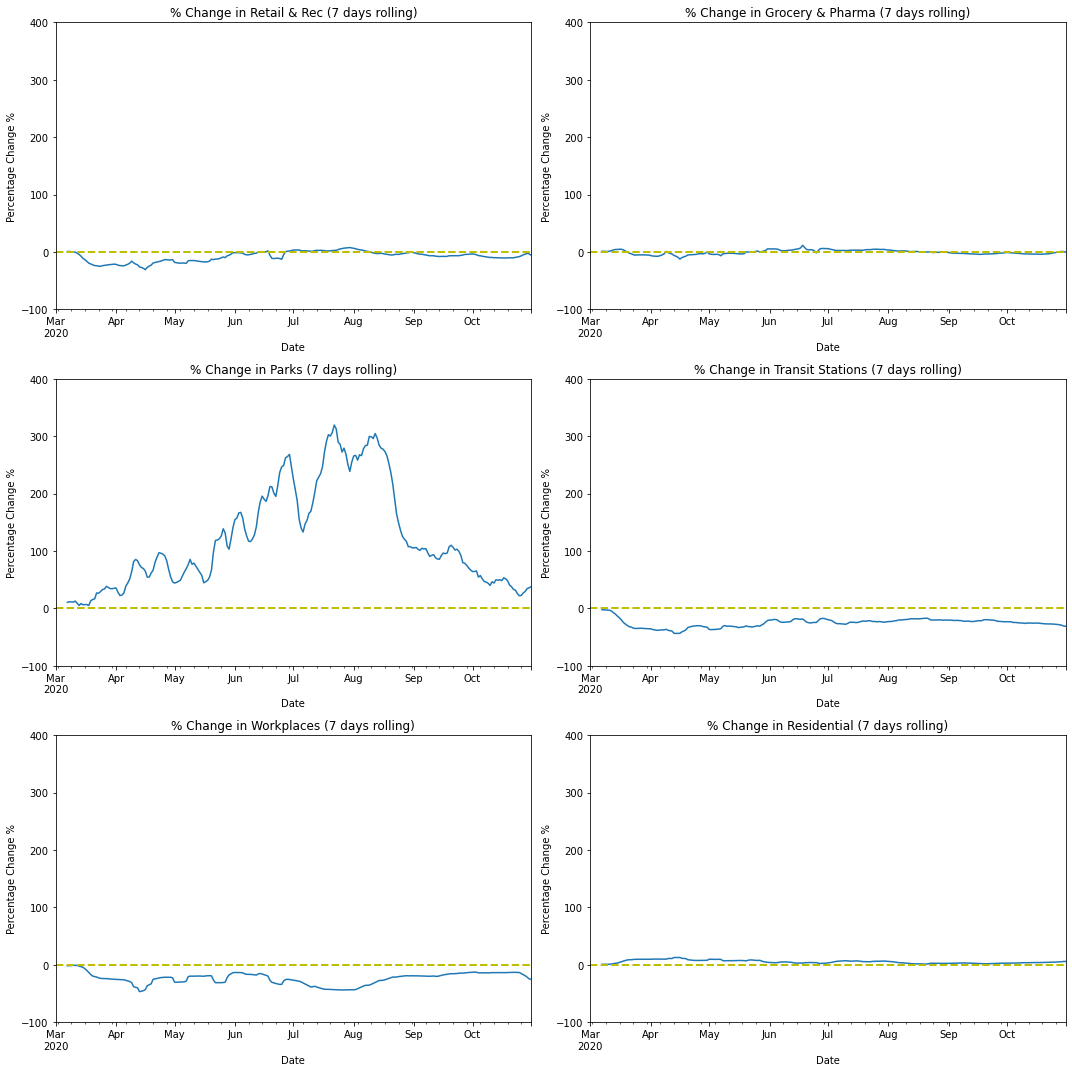

In [55]:
graphsubs(sweden,7)

General Trends at 7 day rolling mean:
- *Retail & Rec:*  
We can see a slight dip in March/April followed by a rise back to normal levels for the remaining period. This small dip is caused by the initial panic caused by the virus' first outbreak during which the Swedish people took it upon themselves to stay at home. The outbreak passed and people went back to normal mobility levels. Some outliers/irregularities can be noticed possibly due to holidays such as Easter. The weekend effect discussed earlier has been smoothened out.
- *Grocery & Pharma:*  
The trend is generally stable and smooth on the baseline showinig minimal changes since March. The weekend effect has been smoothened out. Minor peaks can still be seen just before public holidays followed by minor troughs on the public holidays.
- *Parks:*  
Even after smoothening the weekly cycles, extremely high variance which can be seen and related to weather conditions. Peaks throughout the summer and drops again once October starts due to seasonality. These summer peaks are at extremely high levels over 300% due to Sweden's warm summers in comparison to its cold snowy winters. Some rises correlate to public holidays.
- *Transit Stations:*  
Overall slight drop from the baseline but relatively stable with minor fluctuation after the smoothening of the weekend effect. Slightly lower levels during the first outbreak which can be related to distanced learning for all schools. However by June, post-primary students went back to schools thus the slight upward trend. In addition, public transport was made free during the pandemic which could have encouraged a slight increase in usage, specially by tourists/visitors in the summer.
- *Workplaces:*  
Little fluctuation, quite stable below the baseline. This is due to the government encouraging working from home and the self discipline of Swedish people to do so, in addition to the Swedish companies having the technology to do so. We see some short-lived troughs which all correlate to public holidays. The trend seems to end Octoboer downwards, likely due to the second surge in cases and new restrictions imposed.
- *Residential:*  
Very regular and stable. Slightly lifts off the baseline during the first wave of the virus due to the Swedish sense of responsibility following WHO advice on staying at home in addition to a sense of fear which died out by the summer. Also due to more people working/studying from home until June when many students returned back to school. Minor upward bumps can be seen around holidays like Easter when people stay at home more. The trend seems to end October with a slight increase likely linked to the new surge of cases and restrictions in Sweden.

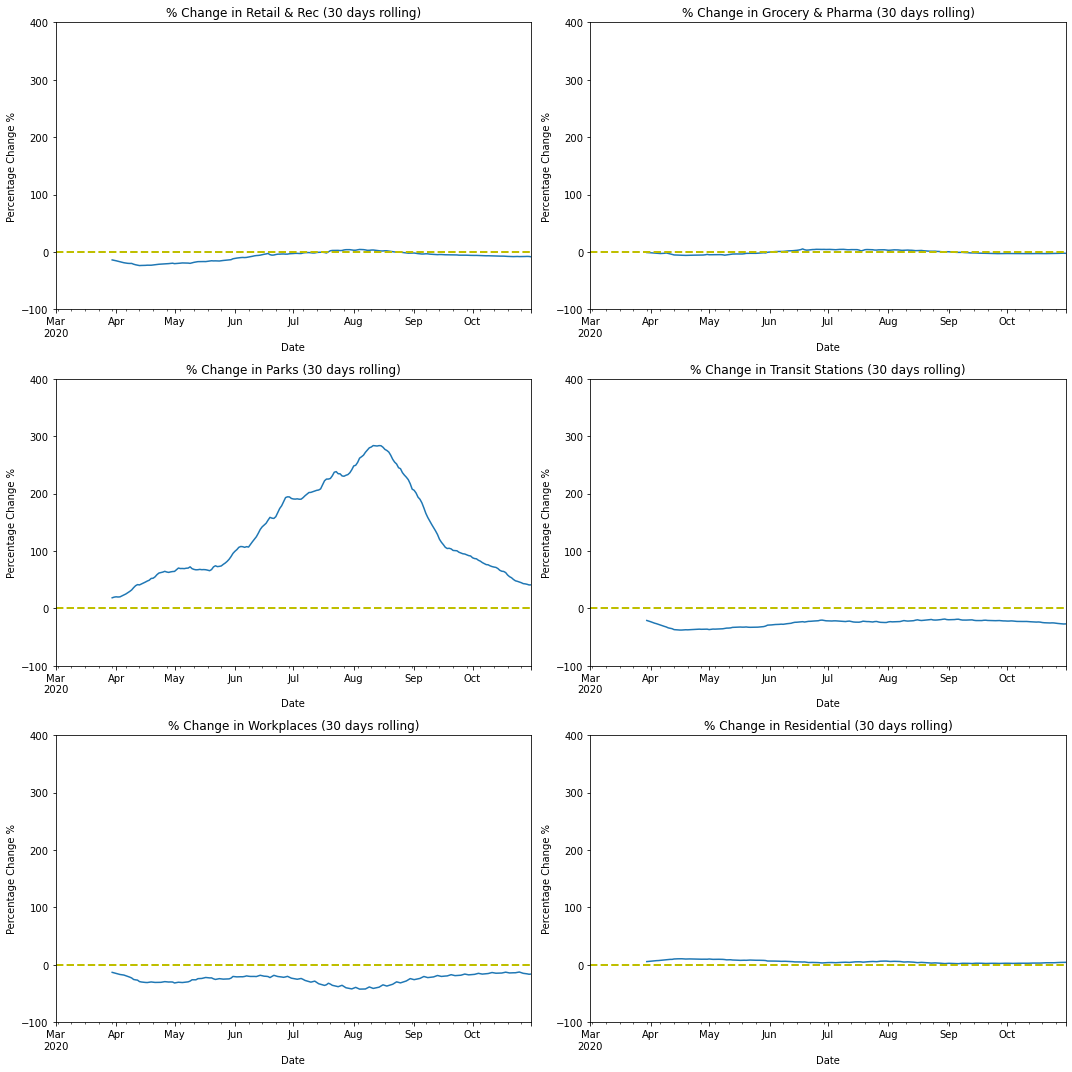

In [56]:
graphsubs(sweden,30)

General Trends at 30 day rolling mean:
- *Retail & Rec:*  
The effect of the public holidays has been smoothened out. Now we can clearly see the general trend that starts off slightly below the baseline due to initial panic and closures, then by June returns and stabilises at normal baseline level. The beginning of a new dip could happen as signallened by the end of October in time with the new stricter government restrictions due to the new surge in cases.
- *Grocery & Pharma:*  
Extremely smooth and stable and nearly perfectly matching the normal baseline level. This shows that the pandemic had no effect on this location category as they remained opened and Swedish people did not panic buy.
- *Parks:*  
Seasonality still highly evident as the trend towers during the summer to extremely high percentage changes and drops on either side. Some local peaks still correlate to bank holidays. A relatively steep drop in September could be due to the return of schools and universities as well as colder weather.
- *Transit Stations:*  
Smooth trend with a drop during the first wave of cases in March-June. This was due to precautionary restrictions the Swedish people imposed on themselves as well as the closure of schools and some workplaces. By June the line is closer to the baseline as post-primary schools re-opened and some tourists came into the country. In addition public trasnport was made free which might have encouraged people to use it more. This level remains stable till the end of October where a downward trend can be forecasted specially with the new wave of cases in the country. Also note that the public transport ran less trips contributing to the overall negarive percentage change.
- *Workplaces:*  
Effect of weekends highly nerfed even though weekly small peaks can still be seen which signal a change towards the baseline during the empty weekends. Overall the trend is below the baseline due to the Swedish government encouraging remote working. The first dip in the trend is during March-June due to it being the start of the pandemic with fear lingering in people. The second dip is more interesting as it came during a time of low new cases during the summer. This dip may have been caused by annual leaves as nice summers are a good time for Swedish people to take off work.
- *Residential:*  
Extremely smooth general trend with the weekend effects nerfed. A smooth peak can be seen during the first surge in cases and then a return to normal baseline levels can be seen for the remaining period. A new smooth peak may be building up due to the new restricitons imposed by the government recently.

**Summary of the Visualisation and Characterisation**  
Effects of Restrictions 
>- Sweden did not have a national lockdown yet on the contrary of most countries. However, the did impose some restrictions including shutting of schools, universities and recommending remote working from March till June. After that the country had little to no restrictions. Unfortunately a new surge in cases in late October promted the government to imposed new stricter restrictions which may lead to a full lockdown.
>- We can see that these restrictions have a had an effect on the mobility data but not a huge one. We see that between March and June Retail, Transit and Workplaces took a slight dip below the baseline level. We see a hint of these dips reappearing towards the end of October with the announcement of new restrictions.
>- In the period between restrictions retail returned to baseline level, transit remaind slightly below the baseline while workplaces stayed in the dip due to workplaces not opening up.
>- It is also worth noting that the residential category gained a few percentage rises during March-June period due to students and employees staying at home.

Effects of the pandemic in general
>- The responsibility within Swedish citizens made them stay more at home and favour remote working thus the trends of workplaces and transit stations sit just below the baseline throughout the timeline.
>- This allowed them to keep life relatively normal thus keeping categories like Grocery, Retail at normal baseline levels.

Effects of Pubic holidays  
>- Workplaces mobility drops the most during public holidys in Sweden as their dates are not fixed thus are being compared to the baseline of a regular working day.
>- Parks and/or residential mobility increase the most during holidays due to people having free time to go outdoors or spend it with family.
>- Grocery&Pharma increase slightly just before a holiday then dip on the holiday itself below the baseline due to people shopping before the holiday and some shops closing on the day itself.

Effects of Weekends  
>- Most significant at the workplaces and transit stations location categories as during weekends workplaces are usually empty anyway and transit runs on reduced timetables thus a return to the baseline is seen every weekend in both.
>- A similar effect can be felt less clearly on the residential category as this location usually gets more mobility on weekends thus we see a drop towards the baseline every weekend.
>- Retail and Grocery before the pandemic used to get most people on weekends but post-covid with people having more free time, many started doing their shopping during the week thus weekly minor peaks can be seen above the normal baseline on weekdays and a return to the baseline on weekends if not a slight drop.

Overall Effect  
>- There is an overall increase of mobility in the summer which is likely, aside from the weather, affected by the fact that many people headed to Sweden for their holiday as it had nearly no restrictions and "normal" life with parties and so on. 

**<font color= blue>Part (c): Compare and contrast how the series for the different location categories have
changed over time for the country. To what extent are these series correlated
with one another. </font>**
>- Visual comparison
>- Calculate the correlation / similarity
>- Comparison of general trends

**Visual Comparison**   
From part (b)  
Conducting a quick visual comparison between the different location categories graphed in part (b):
>- There does not seem to be much correlation between the different categories.
>- It seems that an increase in residential mobility acccompanied with a decrease in workplaces mobility equals a decrease in transit stations mobility as people do not use public transport when they are at home.
>- Groceries & Pharma were not affected by any restrictions and had normal levels of mobility with minor outliers due to holidays.
>- Parks do not share any common trends with another location category most likely due to the affects of seasonality and weather on it.

**Similarity Calculations**   
- Using pearson correlation  
- Plots  
- Confirm using cosine similarity which is quick and excellent at finiding similarities. This technique does not centre the data. It uses the cosine angle from the origin to measure.
- The Pearson correlation normalizes the values of the vectors to their arithmetic mean. In geometrical terms, this means that the origin of the vector space is located in the middle of the set, while the cosine constructs the vector space from an origin where all vectors have a value of zero.

In [57]:
#Find the pearson's correlation between all the different categories
corr=sweden.corr(method ='pearson') 
corr

,Retail & Rec,Grocery & Pharma,Parks,Transit Stations,Workplaces,Residential
Retail & Rec,1.000000,0.786666,0.421236,0.428051,-0.089054,-0.267225
Grocery & Pharma,0.786666,1.000000,0.298752,0.276384,-0.095933,-0.089202
Parks,0.421236,0.298752,1.000000,0.285428,-0.336634,-0.190036
Transit Stations,0.428051,0.276384,0.285428,1.000000,0.637962,-0.869165
Workplaces,-0.089054,-0.095933,-0.336634,0.637962,1.000000,-0.789955
Residential,-0.267225,-0.089202,-0.190036,-0.869165,-0.789955,1.000000


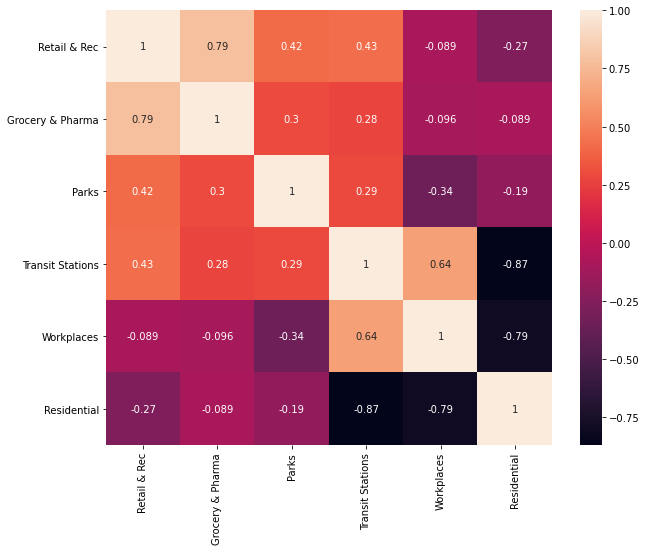

In [58]:
#Using seaborn show the correlations on a heatmap
fig, ax = plt.subplots(figsize=(10,8))       
sns.heatmap(corr, annot=True, ax=ax)
plt.show()

From the above table and heatmap we can tell which categories are closely correlated (>0.7), which are inversely correlated (<-0.7) and which have no correlation.  
- Most closely correlated:  
>-- Retail&Rec AND Grocery&Pharma = 0.79  

- Inversely Correlated:
>-- Residential AND Transit Stations = -0.87  
>-- Residential AND Workplaces = -0.79   

- Least/No Correlation:
>-- Grocery&Pharma AND Residential = -0.089  
>-- Retail&Rec AND Workplaces = -0.089     
>-- Grocery&Pharma AND Workplaces = -0.096     

Now let us graph some of these and calculate their cosine similarity

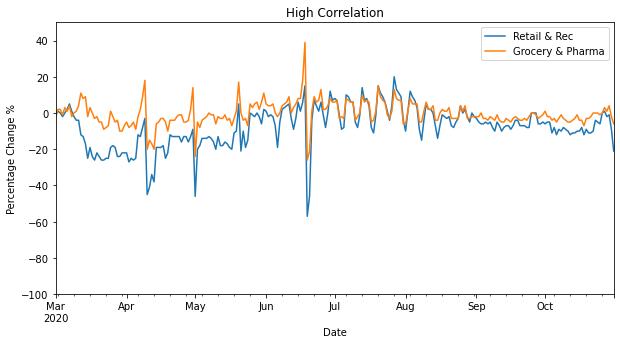

In [59]:
graphplot(sweden[['Retail & Rec','Grocery & Pharma']],"High Correlation","Date","Percentage Change %",-100,50)

In [60]:
#Note that spatial.distance.cosine computes the distance, and not the similarity. 
#So, you must subtract the value from 1 to get the similarity.
result = 1 - spatial.distance.cosine(sweden['Retail & Rec'].values, sweden['Grocery & Pharma'].values)
print("The cosine similarity for Retail&Rec AND Grocery & Pharma is: ",round(result,2))

The cosine similarity for Retail&Rec AND Grocery & Pharma is:  0.68


From the graph we can see how closely correlated these two cateogries are as they nearly follow each other's patterns perfectly at all times, when one trend goes up so does the other and vice-versa. This is because retail and grocery were nearly not affected at all by the pandemic except a minimal drop (more in retail) between March and June. They followed the same pattern by dropping slightly in the first 3 months then moving back and stabilising around normal baseline levels.  
Note that both have outliers at the same times, these are holidays, shopping for both groceries and retail shoots up just before a holiday and drops low on the holiday itself. The peak is larger in grocery while the drop is more significant in Retail. In addition both have the same weekly patterns as explained before pre-covid people shopped more on weekends and less on weekdays but post-covid similar shopping levels are present through out the week thus they have a uniform zigzag pattern.  
The 0.68 cosine similarity is quite low as most percentage changes are more dramatic in Retail as it is more fragile than groceries which are essential goods. Thus even though they correlate pattern wise, Retail for example suffered a much larger percentage drop between March-June.

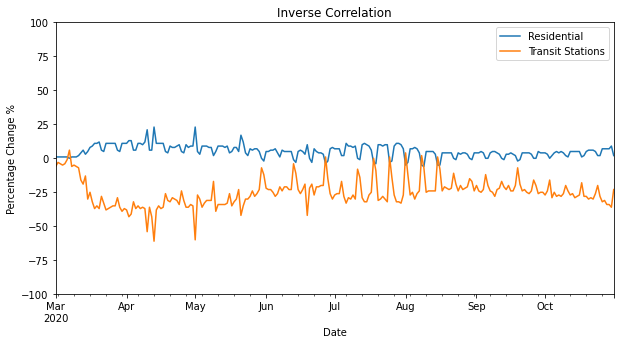

In [61]:
graphplot(sweden[['Residential','Transit Stations']],"Inverse Correlation","Date","Percentage Change %",-100,100)

In [62]:
result = 1 - spatial.distance.cosine(sweden['Residential'].values, sweden['Transit Stations'].values)
print("The cosine similarity for Redisdential AND Transit Stations is: ",round(result,2))

The cosine similarity for Redisdential AND Transit Stations is:  -0.92


The above categories are inversly correlated as when more people stay at home less people use public transport and vice-versa. We can also see during the first breakout (March-June) that there is less mobility at transit stations while there is increased mobility at residential locations. We can see that during weekends both tend towards the baseline as during the weekends before COVID-19 the same still happened with transit stations mobility being low and residential mobility high.   
The cosine similarity is extremely negative at -0.92 which hows how strong this inverse correlation relationship is as this signifies the extent the percentage changes are opposite(but similar values) and far apart.

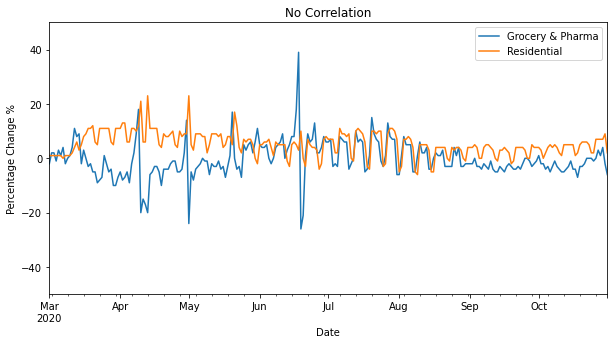

In [63]:
graphplot(sweden[['Grocery & Pharma','Residential']],"No Correlation","Date","Percentage Change %",-50,50)

In [64]:
result = 1 - spatial.distance.cosine(sweden['Grocery & Pharma'].values, sweden['Residential'].values)
print("The cosine similarity for Grocery & Pharma AND Residential is: ",round(result,2))

The cosine similarity for Grocery & Pharma AND Residential is:  -0.1


In a quick glance you may think there is some sort of correlation between the above two categories. However if you look closely you can see that Grocery&Pharma have been around the baseline throughout the period as it was not affected by the pandemic thus normal activity resumed. While residential locations experienced increased mobility during the first and the new second surge of the virus in the country as more people worked and studied from home, thus it was affected by the pandemic.  
The cosine similarity value of -0.1 means that the points at a given x averaged nearly 90 degree angle from each other from the origin, this is the halfway line as the angles range is (0-180), thus proving that this is random and there is no correlation.

**Comparison General Trends**   
Graph raw, rolling 7 and rolling 30 in 3 graphs

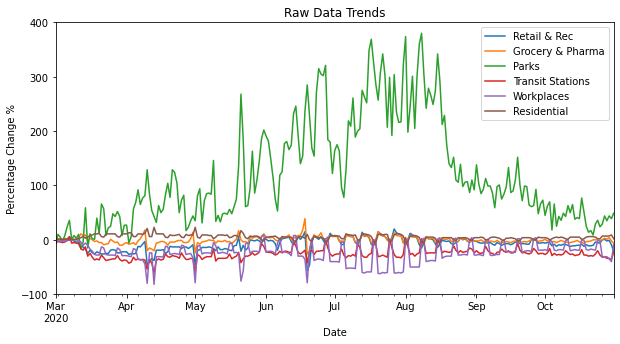

In [65]:
graphplot(sweden,"Raw Data Trends","Date","Percentage Change %",-100,400)

The raw data category trends here are hard to compare due to the outliers and heavy fluctutations on weekends / holidays. Yet we can still see:

- Parks are the exception in terms of the amount of % change from the baseline reaching nearly 400% during the summer.

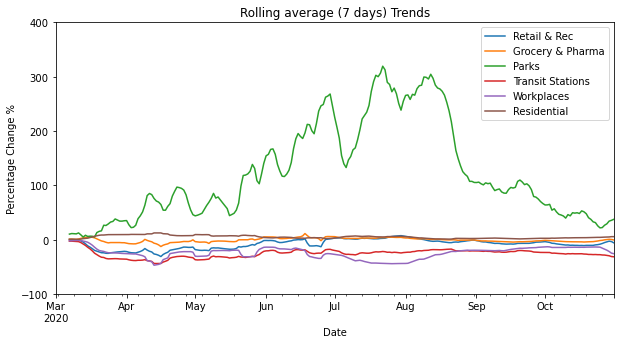

In [66]:
graphplot(sweden.rolling(7).mean(),"Rolling average (7 days) Trends","Date","Percentage Change %",-100,400)

Here we can see the trends more clearly as the 7 day mean rolling average nerfs outliers (mostly weekly outliers). This still supports what we saw earlier and adds:

- Parks fluctuate a lot even after applying the rolling average which may be due to seasonality and holidays as well as dependency on weather.
- There does not seem to be much correlation between any pair of trends, one of the reasons is that the pandemic did not cause a huge and lasting disturbtion in mobility patterns in Sweden.
- Transit and Workplaces seem to be slightly correlated and change by the same value as their trend lines go together.

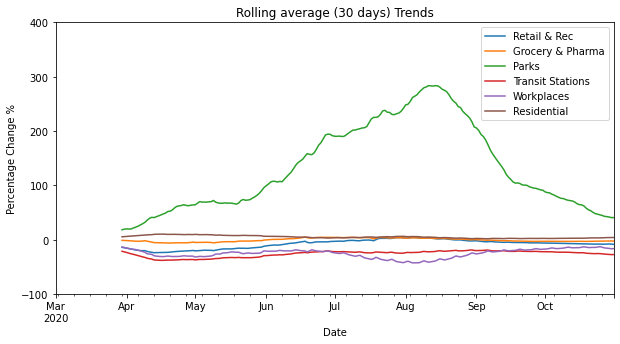

In [67]:
graphplot(sweden.rolling(30).mean(),"Rolling average (30 days) Trends","Date","Percentage Change %",-100,400)

The 30 day rolling average smoothens the trends more. We can cearly see that:

- Transit stations are close to being perfectly inversely correlated to residential locations. This is because when people stay at home they logically do not frequent transit stations and vice-versa. For example when all education became remote at the start, transit dropped and residential rose, but in June when some students went back to school, residential dropped and transit rose.
- Workplaces tend upwards towards the baseline each weekend due to weekends having a low mobility at workplaces even before COVID-19. A similar but less evident phenomena is seen in Transit stations.
- Parks are clearly seasonal and still fluctuates a lot even after the smoothening due to holidays and unpredictable weather conditions. This huge percentage jump is likely due to Sweden having harsh cold winters and pleasant summers.
- All categories fall below the baseline during the first surge of cases (March-June) apart from residential and parks which goes above it. This is because people went to parks as allowed exercise and the weather got better. Residential experienced an increase due remote study and work.
- Retail mobility going back to normal levels during the summer may also have been because of tourists flocking to Sweden to experience "normal life" without pandemic restrictions such as wearing masks. These tourists alongside free public transport may have contributed to the slight rise in transit stations during the summer as well.

**<font color= blue>Part (d): Suggest explanations for any differences that you have observed between the
time series for the location categories. </font>**  
List of differences noted:  
*Correlation differences*  
>- Residential location category is inversely correlated to transit stations mostly, this relationship is plotted on *a joint plot below*. This is because of the simple logic that if people stay at home they do not use public transport and vice-versa. Note that their patterns are near identical thus the high correlation (*can also be seen on the plot below which shows the clear inverse trend*), however the cosine similarity was not that high as it takes into account values and pattern (*this can also be seen as the value though close are not identical on the axes below*). Transit varies much more with larger percentage changes as it is also affected by other categories such as retail and workplaces. Note that in turn workplaces have quite a strong inverse correlation with residential as when people do not go to workplaces they work from home.
>- Following on from the previous point, Transit and Workplaces are closely correlated as they all suffered less mobility at the same times due to closures during different restrictions. This is because the main reason people use public transport normally is to get to and from work 5 days a week. Thus when people work from home they do not go to transit stations. Note that Retail is also closely correlated to the two categories as it suffered more closures at similar times as workplaces and people use public transport to get to retail.
>- The least correlation is between Grocery&Pharma and Residential locations due to them having almost nothing in common. People need to buy groceries regardless if they stay at home or not as they need to eat. Groceries are an essential good whose commuting mobility was not affected throughout the pandemic in Sweden, while residential suffered from rises and falls due to restrictions on work, education etc.


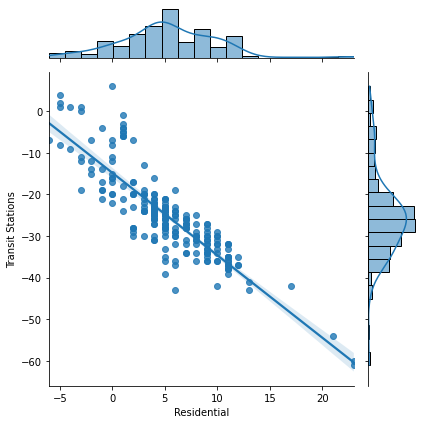

In [68]:
seabornplot(sweden,sweden["Residential"],sweden["Transit Stations"],"jointplot")


*Other differences*  
>- Grocery&Pharma varied away from the baseline the least due to them being essential goods that humans need to survive. In addition they are usually within close proximity of residential locations thus even during the lockdowns the drop is minimal. Logically the next thing that varied the least was residential with tiny rises around stronger restriction times.
>- On the other hand Parks locations had the most fluctuations due to multiple reasons including: Seasonality (During the summer parks get more people, espically because Sweden has very cold winters), Weather conditions (on warm/sunny days people like to go to parks) and public holidays (people go to parks when they are free specially when most indoor activity is closed).
>- Workplaces and Transit stations have reduced mobility while residential locations have increased mobility during the pandemic. However, all of them tend towards the baseline on weekends as this is their "normal" before the virus as workplaces are shut on weekends and public transport is reduced thus people stayed at home to relax. 
>- Retail, Groceries and in turn Transit stations used to mostly get people on weekends as people have time to shop. However with working from home people can shop nearly anyday of the week, thus the pandemic caused these trends to rise during weekdays and drop below normal on weekends as more people have done their shopping during the week. These are minor peaks and troughs that are smoothened by rolling averages.
>- Public holidays cause huge drops in workplaces from the baseline as almost all of them shut. 

# Task 2: Between Country Analysis 


**<font color= blue>Graphing Functions: </font>**
>- In order to make the code more eligible

In [69]:
#Graphing Functions
#Graph the overall mobility
def plotcountries(ra,title,xl,yl,ymin,ymax):
    if ra == 0:
        ax = ireland.mean(axis=1).plot(title = title, figsize=(10,5),label="Ireland")
        plt.plot(italy.mean(axis = 1), label = "Italy")
        plt.plot(sweden.mean(axis = 1), label = "Sweden")
    else:
        ax = ireland.mean(axis=1).rolling(ra).mean().plot(title = title, figsize=(10,5),label="Ireland")
        plt.plot(italy.mean(axis = 1).rolling(ra).mean(), label = "Italy")
        plt.plot(sweden.mean(axis = 1).rolling(ra).mean(), label = "Sweden")
        
    ax.set_xlabel(xl)
    ax.set_ylabel(yl)
    ax.set_ylim(ymin=ymin, ymax=ymax)
    plt.legend()
    plt.show()
    
#Graph the trends with multiple smoothining
def generaltrendra(toplot,title,ymin,ymax):
    ax = toplot.plot(label = "Raw",title = title, figsize=(10,5), color='grey')
    plt.plot(toplot.rolling(7).mean(), label = "7-day", color ='g')
    plt.plot(toplot.rolling(30).mean(), label = "30-day",color='orange')
    ax.set_xlabel("Date")
    ax.set_ylabel("Percentage Change %")
    ax.set_ylim(ymin=ymin, ymax=ymax)
    ax.axhline(linewidth=2, color='r', linestyle="--")
    plt.legend()
    plt.show()
    
#Graph the category for the three countries
def plotcategory(category, title,ymin,ymax):
    ax = ireland[category].plot(title = title, figsize=(10,5),label="Ireland")
    plt.plot(italy[category], label = "Italy")
    plt.plot(sweden[category], label = "Sweden")
    ax.set_xlabel("Date")
    ax.set_ylabel("Percentage Change %")
    ax.set_ylim(ymin=ymin, ymax=ymax)
    ax.axhline(linewidth=2, color='r', linestyle="--")
    plt.legend()
    plt.show()
    
#distribution using seaborn
def distplot(toplot1,toplot2,title,xl,yl):
    ax = sns.displot(x=toplot1, y=toplot2)
    ax.set(xlabel='Percentage Change % ' +xl, ylabel='Percentage Change % '+yl, title = title)
    plt.show()

**<font color= blue>Part (a): Construct a set of time series that represent the overall mobility patterns for the
three countries.  </font>**
>- Plot three plots, one per country showing their overall mobility (one trend line).

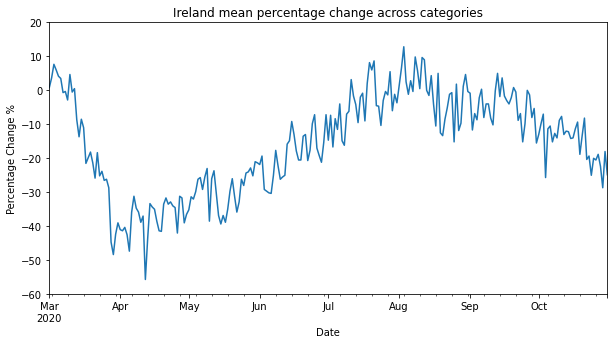

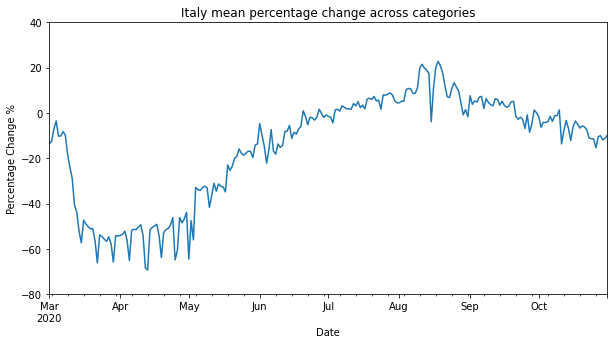

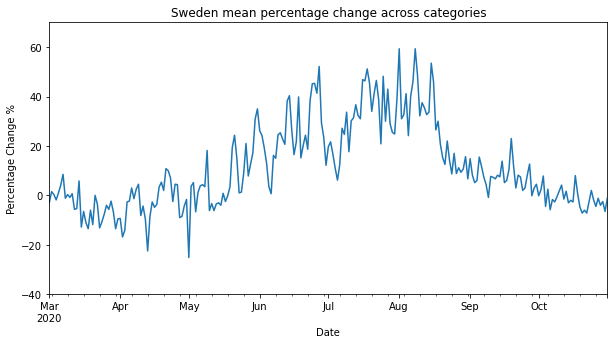

In [70]:
graphplot(ireland.mean(axis = 1),"Ireland mean percentage change across categories","Date","Percentage Change %",-60,20)
graphplot(italy.mean(axis = 1),"Italy mean percentage change across categories","Date","Percentage Change %",-80,40)
graphplot(sweden.mean(axis = 1),"Sweden mean percentage change across categories","Date","Percentage Change %",-40,70)

**<font color= blue>Part (b): Characterise and visualise each of these time series </font>**
>- Visual inspection
>- Compute summary statistics
>- Identification of peaks and troughs
>- Identify general trends via smoothing and grouping
>- Conclude the summary of each graph and why it acted that way

**Visual Inspection**  
We can see from the three plots in part(a) that:
- Ireland's overall mobility suffers a steep drop in March-April corresponding to the country's first national lockdown. This is followed by a steady rise until August-September reaching the peak of % change in mobility. This is likely due to the restrictions being eased accompanied by the seasonality as people move around more in the summer. We then see the trend tending towards another drop due to new restrictions being imposed as well as the weather getting colder.
- Italy's overall mobility suffers an extremely sharp drop in March and remains at very negative percentages until May. This corresponds to the country's first massive COVID-19 outbreak which caused thousands of deaths thus the government imposed an extremely strict full national lockdown. From May till the end of August we see a steady increase in overall mobility in the country due to restrictions being lifted and warm summer weather until the baseline is reached and sightly crossed signalling a return to normal levels. The mobility trend then drops slowly again below normal levels as the government imposes new restrictions continously as the cases are shooting up likely leading to a second national lockdown.
- Sweden's overall mobility does slightly drop in March to -10% but in general remains around normal baseline level. Then from June till August there is a huge rise in mobility up to 60% likely due to a warm summer following a very cold winter in addition to some tourists. After August there is a steep drop in mobility back to normal level as the weather gets colder, however the trend continues to drop below the baseline as new government restrictions are being put into place. 


**Summary Statistics**

In [71]:
print("\tIRELAND\n",ireland.mean(axis = 1).describe())
print("\n\tITALY\n",italy.mean(axis = 1).describe())
print("\n\tSWEDEN\n",sweden.mean(axis = 1).describe())

	IRELAND
 count    245.000000
mean     -15.643537
std       14.485552
min      -55.666667
25%      -26.166667
50%      -13.666667
75%       -3.666667
max       12.833333
dtype: float64

	ITALY
 count    245.000000
mean     -14.922449
std       23.613933
min      -69.333333
25%      -32.833333
50%       -6.833333
75%        3.166667
max       22.833333
dtype: float64

	SWEDEN
 count    245.000000
mean      11.259864
std       17.118980
min      -25.166667
25%       -1.833333
50%        6.666667
75%       22.833333
max       59.333333
dtype: float64


From the above tables we can tell that:
- All countries have 245 entries or days
- Ireland and Italy have very similar means at -16% and -15% respectively. This tells us that overall their mobility dropped during this period. On the other hand, overall, Sweden's mobility increased by 11%.
- Italy has the largest standard deviation (24%) telling us that its mobility data is spread the most thus likely to have fluctuated the most, while Ireland the least.
- Italy dropped 69% below the baseline on a given day making it the largest drop between all countries. This could indicate that Italy had the strictist restrictions.
- Sweden went 59% above the baseline on a given day making it the largest peak above the normal between all countries. This could be due to the strong seasonality in Sweden due to the very cold winters as well as tourists.

**Peaks & Troughs**

In [72]:
print('\n********IRELAND PEAKS*******\n',ireland.mean(axis = 1).sort_values(ascending=False).head(2))
print('\n*******IRELAND TROUGHS******\n',ireland.mean(axis = 1).sort_values().head(2))
print('\n*********ITALY PEAKS********\n',italy.mean(axis = 1).sort_values(ascending=False).head(2))
print('\n********ITALY TROUGHS*******\n',italy.mean(axis = 1).sort_values().head(2))
print('\n*********SWEDEN PEAKS*******\n',sweden.mean(axis = 1).sort_values(ascending=False).head(2))
print('\n********SWEDEN TROUGHS******\n',sweden.mean(axis = 1).sort_values().head(2))


********IRELAND PEAKS*******
 Date
2020-08-03    12.833333
2020-08-08     9.833333
dtype: float64

*******IRELAND TROUGHS******
 Date
2020-04-12   -55.666667
2020-03-29   -48.333333
dtype: float64

*********ITALY PEAKS********
 Date
2020-08-18    22.833333
2020-08-11    21.500000
dtype: float64

********ITALY TROUGHS*******
 Date
2020-04-13   -69.333333
2020-04-12   -68.333333
dtype: float64

*********SWEDEN PEAKS*******
 Date
2020-08-08    59.333333
2020-08-01    59.333333
dtype: float64

********SWEDEN TROUGHS******
 Date
2020-05-01   -25.166667
2020-04-13   -22.500000
dtype: float64


From the above data we can conclude:
- Ireland's largest peak is on the 3rd of August which is a public holiday in the summer thus it is expected for the country's overall mobility to be high. This is because the weather is good and people have time to move around as well as COVID restrictions have been eased. The second peak is a summer weekend which is also expected for the same reasons.
- Ireland's main trough is on Easter Sunday which is expected as many places close down as people spend time with family. Add to that this was during Ireland's strict lockdown which allowed people to only be within 2KM of their homes. The second lowest trough is also on a Sunday during the strict lockdown.
- Italy's two main peaks are before and after a major public holiday called Ferragosto. They are also during the country's hottest month. In addition, during the summer COVID cases dropped and restrictions were eased. Thus it is expected that mobility peaks.
- Italy's two main troughs were during the height of lockdown when people needed a permit to leave their houses. In addition they were Easter Sunday and Monday, days on which many shops and workplaces close and people spend time with their families thus these troughs are not surprising.
- Sweden's top peaks are both summer Saturdays. Sweden had little to no restrictions during the summer, and add to that the warm temperatures which contrast the freezing prior months. This results in shops opening, people moving and tourism rising.
- Sweden's top two troughs are on public holidays, Easter Monday and Labour's day. Shops close and people spend time with family thus the low mobility across the country.

>- Overall the peaks happened during the summer in all countries due to seasonality and the restrictions being eased. On the other hand the troughs happened on public holidays, mainly Easter due to closures, family time and restrictions.
>- Note that Italy's troughs are the most negative followed by Ireland then Sweden. This is likely due to Italy having the strictist lockdown followed by Ireland then Sweden with few restrictions.
>- Note that Sweden's peaks are the highest followed by Italy then Ireland. This is likely due to Sweden's diurnal temperatures, lack of restrictions and slight tourism. Again the seasonality had a larger effect in Italy than Ireland. 

**Identify General Trends**
- Use 7-day and 30-day rolling averages to smooth the trends to remove the effects of weekly cycles or other outliers to enable easy reading of the general trend.

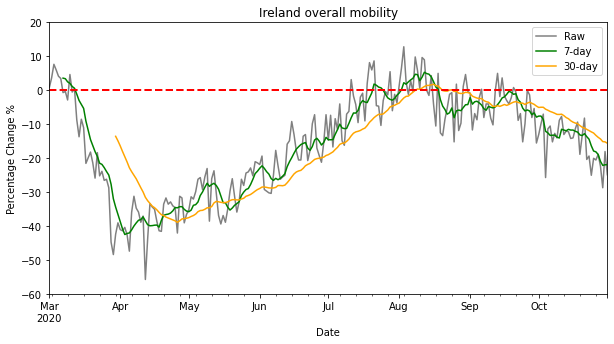

In [73]:
generaltrendra(ireland.mean(axis = 1),"Ireland overall mobility",-60,20)

IRELAND
- As we can see above Ireland follows a general overall mobility trend that falls well below the baseline due to the national lockdown. 
- Once the lockdown is lifted and summer begins the general trend reaches normal baseline levels again.
- After the summer is over and new restrictions are imposed the trend falls again below the baseline and seems to be heading towards a similar trough (possibly shallower) to that during April.

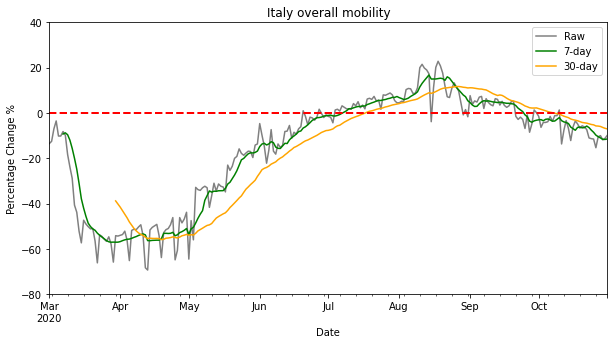

In [74]:
generaltrendra(italy.mean(axis = 1),"Italy overall mobility",-80,40)

ITALY
- Italy's overall mobility trend reachs its largest trough and stabilises there from March till May which corresponds to their full lockdown which was on of Europe's strictist lockdowns, this explains the drastic nearly -70% percentage changes.
- After the lockdown was slowly eased we can see an upwards trend that finally reaches normal baseline levels by July after the summer starts. The summer's seasonal effect pushs the trend above the normal baseline by about 15% change for a month as more people move in the summer with no restrictions.
- The trend after the summer drops below the baseline again and is projected to reach significant negative percentage changes as new restrictions are being put in place in Italy.

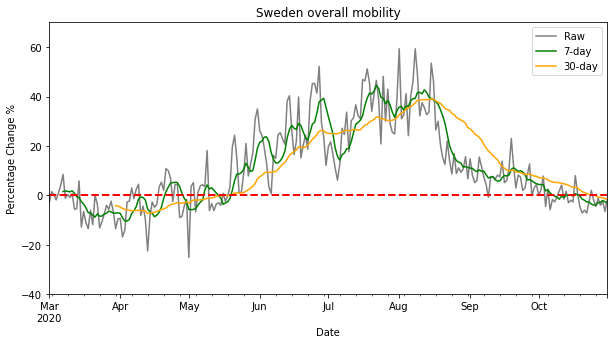

In [75]:
generaltrendra(sweden.mean(axis = 1),"Sweden overall mobility",-40,70)

SWEDEN
- Sweden's overall mobility trend suffers a slight dip (under -20%) when the first wave of cases hit the country due to some closures such as schools and promotion of remote working. 
- As the summer starts and the number of new cases drops, some schools opened again and the trend shoots up to nearly 60% change above the baseline. This is highly due to seasonality as summers are much warmer than winters in Sweden in addition to the country being one of the main tourist destinations in Europe this summer due to the lack of restrictions.
- After the summer was over the trend took a steep drop back to normal baseline level. As October starts, number of new cases in the country shoots up and the governments starts to implement restrictions thus the trend seems to be heading to its largest trough yet.

**Summary of the Visualisation and Characterisation**

- Overall the three countries had their worst periods (lowest percentage changes) at the beginging (March - June). This is due to many different reasons which include lockdowns/restrictions, cold weather, and the general fear that spread during the virus' first wave.
- In addition, all three countries did best (highest percentage changes) during the summer (June - August). This may differ depending on country but factors include easing of restrictions/reopenings, warm weather/seasonality, low number of cases and in Sweden's case slight tourism.
- It also seems that all three countries are suffering from a drop in the trend post-summer (September-October). This is due to the emerging second wave of the virus in Europe which caused new restrictions and closures. This drop seems smaller than the first one in Ireland and Italy as people are less afraid of the virus and the restrictions are more lenient than the first lockdown. However Sweden may be entering its first lockdown yet and therefore reaching its lowest trough.

>- It is also worth reminding that the percentage changes are very different per country as noted earlier with Sweden being the closest to normality around the baseline and Italy the furthest. This correlates with how strict the restrictions are in each country.

**<font color= blue>Part (c): Compare and contrast how the overall time series for the three countries have
changed over time. To what extent are these series correlated with one another. </font>**
>- Visual comparison
>- General Trends Comparison
>- Similarity Calculations
>- Comparison of specific categories 

**Visual Inspection**  
We can see from the plots in parts (a) and (b) that:
- There is a relatively strong pattern correlation between Ireland and Itlay as they seem to follow a similar trend. However they do that at different values thus their value similarity seems low.
- Sweden does vaguley resemble a similar pattern as well however it does not have as major troughs as the other two countries as it did not go into full lockdown. In addition, Sweden's seasonality is way more evident than the other two countries due to Sweden's diurnal temperates.

**General Trends Comparison**

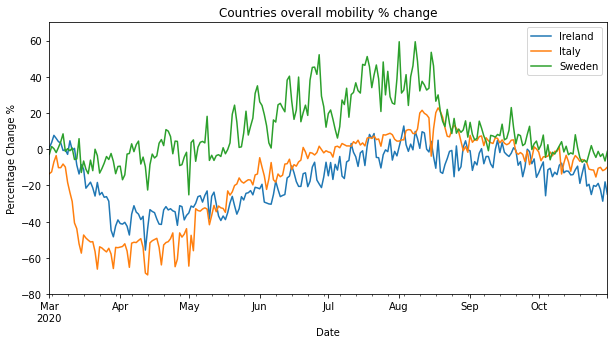

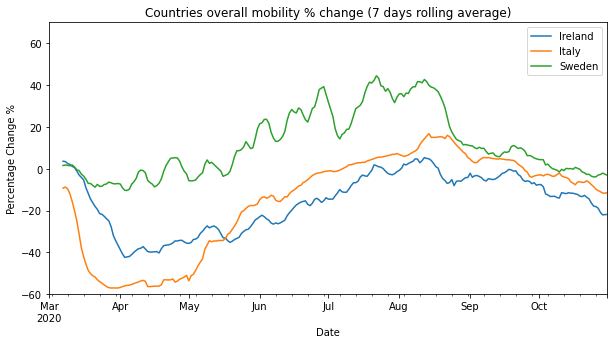

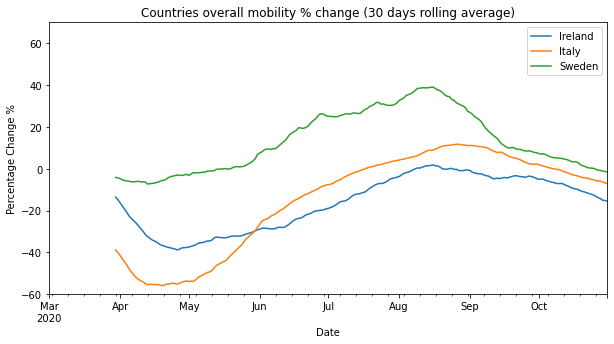

In [76]:
plotcountries(0,"Countries overall mobility % change","Date","Percentage Change %",-80,70)
plotcountries(7,"Countries overall mobility % change (7 days rolling average)","Date","Percentage Change %",-60,70)
plotcountries(30,"Countries overall mobility % change (30 days rolling average)","Date","Percentage Change %",-60,70)

The above three plots further support the visual inspection done earlier. We can see that:
- Ireland & Italy follow a very similar pattern.
- Ireland & Italy have similar percentage changes after June.
- Sweden does not share a similar pattern of percentage changes with the other two countries.
- Sweden rarely falls below the normal baseline unlike the other two countries. Sweden also shoots up the most above the baseline.
- High mobility summers is shared at different rates across all countries.
- The three countries' mobilities are highly affected by public holidays as seen on both the raw data and 7 day rolling average plots.
- The three countries' mobilities are affected by weekly patterns seen on the raw data graph.

**Similarity Calculations**
- Pearson's correlation
- Cosine Similarity

In [77]:
print("Average mobility pearson's correlation between:\n")
print("- Ireland & Italy:",round(ireland.mean(axis = 1).corr(italy.mean(axis = 1), method='pearson'),2))
print("- Ireland & Sweden:",round(ireland.mean(axis = 1).corr(sweden.mean(axis = 1), method='pearson'),2))
print("- Italy & Sweden:",round(italy.mean(axis = 1).corr(sweden.mean(axis = 1), method='pearson'),2))

Average mobility pearson's correlation between:

- Ireland & Italy: 0.79
- Ireland & Sweden: 0.51
- Italy & Sweden: 0.62


In [78]:
print("Average mobilities cosine similarity between:\n")
print("- Ireland & Italy: ",round(1 - spatial.distance.cosine(ireland.mean(axis = 1), italy.mean(axis = 1)),2))
print("- Ireland & Sweden: ",round(1 - spatial.distance.cosine(ireland.mean(axis = 1), sweden.mean(axis = 1)),2))
print("- Italy & Sweden: ",round(1 - spatial.distance.cosine(italy.mean(axis = 1), sweden.mean(axis = 1)),2))

Average mobilities cosine similarity between:

- Ireland & Italy:  0.84
- Ireland & Sweden:  -0.11
- Italy & Sweden:  0.14


As we can see from the above calculations:
- Ireland and Italy have the highest pattern correlation as was forecasted earlier. This means that in general the trends go upwards at the same time and downwards at the same time mostly.
- We can also see that Ireland and Italy have the highest cosine similarity, this further proofs that their patterns correlate but also means that overall their pattern and values are very similar. We can see that their percentage changes are of similar value from June onwards.
>- This high correlation and similarity between Ireland and Italy is due to two reasons. Firstly both countries suffered from two COVID waves at roughly the same times (March & October) and they both responded by imposing restrictions and full lockdowns. The other reason is seasonality. 

- Ireland and Sweden have the lowest pearson's correlation signifying how different their patterns are, this is due to Ireland's overall mobility suffering and fluctuating from a couple of national lockdowns while Sweden only implemented minimal restrictions thus kept its overall mobility around the baseline. In addition Sweden's diurnal temperates caused a summer peak four times higher than Ireland.
- The two countries also have a cosine similarity closest to 0. This tells us that not only are the patterns not matching but so are the percentage changes.
>- Sweden even though did have similar COVID cases waves, did not go into full lockdown. In addition, the effect of seasonality in Sweden is much larger than that in the other countries thus the low similarity values.

- The reason Sweden and Italy have slightly higher correlation than Sweden and Ireland is because of the seasonality in Italy being more significant than in Ireland.

**Comparing Countries by Location Category**
- 6 plots (one per location), 3 lines per plot (one per country)

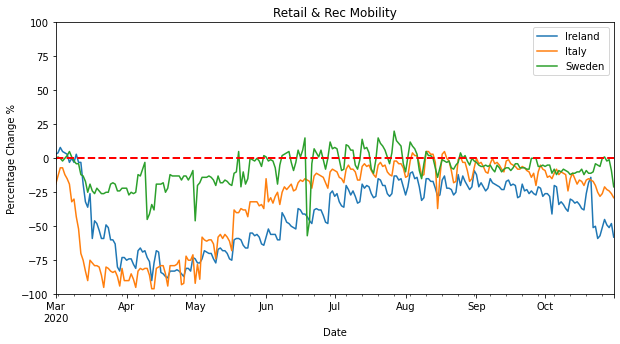

In [79]:
plotcategory("Retail & Rec", "Retail & Rec Mobility",-100,100)

Retail & Rec Mobility:
- We can see that the overall trend here matches that of the overall mobility. A drop during the first wave of COVID cases in March-May, recovery to baseline level in the summer followed by a new decline in trend along with the new wave of cases.
- Italy dropped the steepest due to one of the most strict lockdowns in Europe with people needing permits to leave houses and obviously retail being deemed non-essential. Ireland and Italy drop to around the same level during the first wave while Sweden only drops slightly as it only had restrictions and government advice and no lockdown. Italy dropped first as it had the first major outbreak of the virus.
- The trends build up towards the summer when they nearly all reach baseline level (normal) as lockdowns and restrictions were being lifted and the good weather promoted mobility. In Sweden the trend goes slightly above the baseline likely due to some tourists.
- Second wave of cases hit in October and new restrictions were imposed. This is most significant in the Ireland trend as we can see a steep drop at the end of October following the closure of retail. Similar trends are projected for Italy and Sweden as they head into lockdown.
- Note that all countries suffer from a weekly cycle as discussed in task 1 and outliers due to public holidays.
>- We can conclude  that retail is likely the most sensitive category in all countries to lockdowns/restrictions as it is a non-essential category.

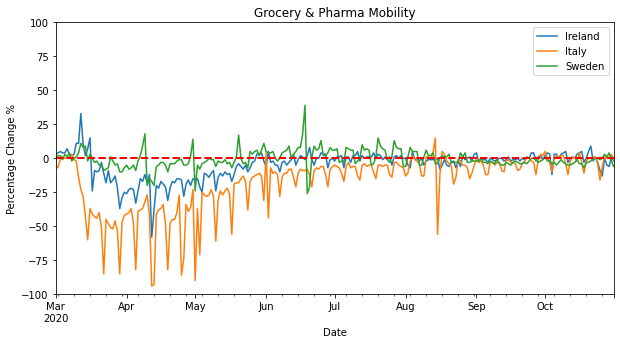

In [80]:
plotcategory("Grocery & Pharma", "Grocery & Pharma Mobility",-100,100)

Grocery & Pharma:
- We can see that in the three countries there is a drop in the trend below the baseline during the first wave of cases. However, once this trend recovers to baseline levels during the summer it never drops again and remains stable at the baseline.
- Italy dropped most significantly again due to them having the strictist lockdown due to the high cases and deaths. People were allocated times to go grocery shopping thus the significant drop. 
- Sweden only dropped slightly as their were no restrictions imposed, the slight drop is due to people being responsible and reducing times outdoors.
- All countries did not drop again due to Grocery & Pharma being deemed essential and was not restricted at any further point.
- Note that we can see Ireland's panic shopping just before the national lockdown started with the peak in March.
- Note that all countries suffer from a weekly cycle as discussed in task 1 and outliers due to public holidays.
>- We can conclude that Grocery & Pharma was only affected during the first wave and since then has been regulated well and kept without restrictions thus remaining at a baseline level as it is essential. 

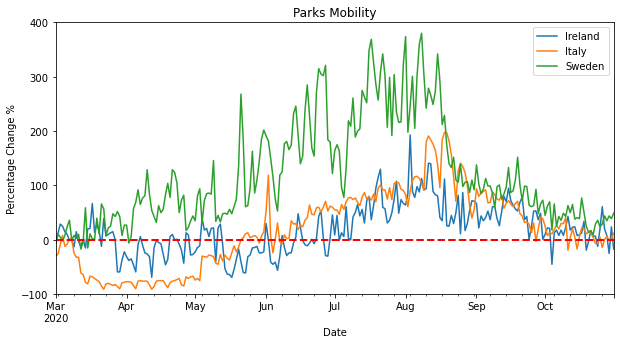

In [81]:
plotcategory("Parks", "Parks Mobility",-100,400)

Parks:
- We can quickly tell that this is the most random and highly fluctuating category in all three conutries.
- We can still see a general trend in the three countries that shows a peak in the summer that drops on either ends.
- Ireland and Italy drop below the baseline due to lockdowns forcing people to stay within their houses. While Sweden did not drop below the baseline as their were no such restrictions.
- This high fluctuation is due to seasonality as well as public holidays. For example Sweden has the most diurnal temperatures (difference between summer and winter), this makes people stay at home all winter and leave the house in the summer explaining the peaks reaching 400% in the summer. While in Ireland the temperatures do not vary that much between seasons thus peaks at around 100%.
- Parks mobility have low correlation with all other categories in all countries due to them remaining open during lockdowns and people visiting them regardless of work or transport.
>- We can conclude that Parks mobility is mostly affected by seasonality and the extent it is affected by depends on the diurnal temperatures in the country as well as tourism and public holidays.

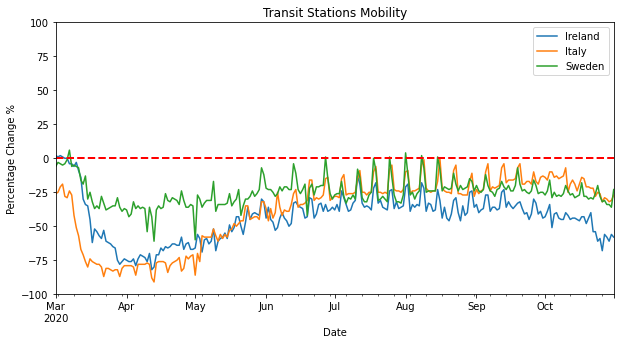

In [82]:
plotcategory("Transit Stations", "Transit Stations Mobility",-100,100)

Transit Stations:
- Suffered a significant drop keeping it below the baseline in all three countries.
- The general trend shows that in the three states a steep drop happened during the first surge of cases (March - May). This was followed by an upward trend in the summer reaching just below baseline levels which then fell into a downward trend post-August.
- The trend dropped in Ireland and Italy during lockdowns as public transport capacity was limited and schedules were reduced. While in Sweden some lighter restrictions were imposed but the trend still dropped due to the people being responsible and staying at home.
- In the summer the levels of public transport did rise due to lockdowns being lifted and seasonality but they did not go back to normal as they still had limited capacities and more people opted to use private cars or other modes of transport to avoid catching the virus.
- A weekly cycle can be seen in all three countries with all the trends moving towards normal baseline level on weekends due to the weekends having low mobility in transit stations before the pandemic. Steep drops can be be seen on public holidays in the three countries.
>- We can conclude that Transit Stations mobility was highly affected negatively by the pandemic in the three countries due to limited capacity and scheduling. More people opted to use other modes of transport. A similar trend is noted in the three countries.

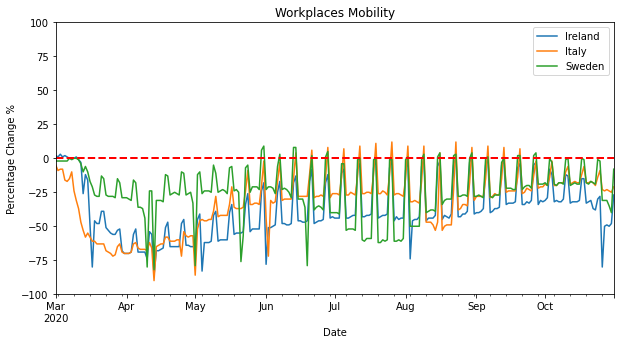

In [83]:
plotcategory("Workplaces", "Workplaces Mobility",-100,100)

Workplaces:
- We can see that workplaces follow a weekly cycle in all three countries. This is due to their mobility returning to normal baseline levels on weekends as they had low mobility on weekends already before the pandemic.
- The effect of public holidays is significant in the three states shown by a huge, sharp downward trough in the trend.
- We can see that the three countries have very different general trends.
- - Ireland: Steep drop in March-May due to national lockdown closing up all workplaces. As the summer approaches the trend lifts slightly due to some workplaces opening up. In October the second lockdown begins and the workplaces take a hit and drop to similar levels as the first lockdown.
- - Italy: Drops to similar levels as Ireland during the national lockdown (March-May), however it recovers to higher rates from that point one than Ireland.
- - Sweden: The government recommended but did not inforce remote working thus we see a lesser drop than the other two countries during the first wave. However, remote working increased in Sweden during the summer. We then see a return to workplaces in September which is haulted and drops again due to the second wave of cases. The drop in the summer is also likely linked to Sweden's seasonality with most people taking their annual holidays in the summer.

- Italy having the highest increase post-first wave in workplaces mobility is likely linked to its type of economy. A lot of Italy specially in the South is not able to work remotely, this pushed the government to open up workplaces to stimulate the economy and people to go back to work. On the other hand Ireland and Sweden have more developed economies that are highly based on office work which switched seemlessly into remote working thus a less urgent need to re-open workplaces.

>- We can conclude that workplaces suffered negatively in all countries due to remote working becoming the new norm. We can also seen that workpalces mobility recovery speed depends on the country's economy.

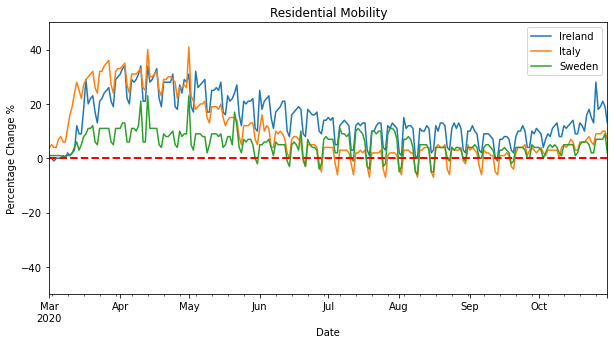

In [84]:
plotcategory("Residential", "Residential Mobility",-50,50)

Residential:
- We can see that the general trend in three countries is nearly fully above the baseline signalling an overall increase in the residential mobility unlike other categories.
- A weekly cycle is also evident as residential locations experienced high mobility on weekends prior to covid thus tending towards the baseline. 
- Italy has the highest peak seen during the first wave of the virus due to the very strict national lockdown which required people to hold permits to leave their homes. As the lockdown lifted and the weather became better people stayed at home less thus a return to normal baseline levels.
- Sweden had an increase during the first wave too but nearly half that of Italy. This is due to no national lockdown being imposed. The increase is due to remote working and education. Thus once schools went back and weather got better we see a return to normal baseline levels.
- Ireland had a similar peak during the first wave to Italy but never returned to normal baseline level during the summer. This is likely due to remote working being more feasible in Ireland.
- In the three countries the trend seems to be going up in the end of October due to the second wave of the virus and restrictions being imposed.

>- We can conclude that the pandemic has caused a surge in residential locations mobility in all countries as more people stay at home due to remote working, education and closures of shops.

**<font color= blue>Part (d): Suggest explanations for any differences that you have observed between the
time series for the countries. </font>**  
List of differences noted:  

- **Lockdowns**  
Each of the three countries had different approaches when COVID-19 cases surged. Ireland and Italy had a similar approach, however, the Italian government called on a full lockdown which was the strictist in Europe with people needing permits to leave their houses. Comparitively the strictist Irish lockdown bounded people within 2Km of their houses leaving room for mobility. On the opposite side we have Sweden which only closed schools and promoted remote working and did not inforce any other restrictions until recently.  
So what impact did these different approaches have?  
The stricter the lockdown/restrictions, the more negative the overall percentage change in mobility in the country and vice-versa.   
Below we can see the high correlation graphed between Ireland's and Italy's overall mobilites. We can also see their mostly negative percentage changes due to the lockdown.  
The stricter the restrictions, the lower the commuting mobility.

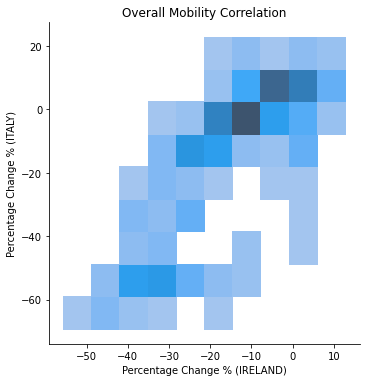

In [85]:
distplot(ireland.mean(axis = 1),italy.mean(axis = 1),"Overall Mobility Correlation", "(IRELAND)", "(ITALY)")

- **Remote Working**  
The three countries performed differently in this category.  
During the March Lockdown Ireland and Italy forced shut workpalces. Once this lockdown was lifted Italy's workplace mobility rose back up to near the baseline meaning people went back to work. On the other hand Ireland's workplace mobility never recovered fully and remaind well below the baseline. 
This is likely because Italy's economy is market based while Ireland is more office based. Office based work could seemlessly move to being remote for a long time, boosted by Ireland's strong internet infrastructure. On the other hand, Italy could not do this.  
  
  Sweden did not force working from home but only promoted it, thats why the drop in workplace mobility was slower than the other two countries, but it also remained well below the baseline due to similar reasons to Ireland.  
    
    Keep in mind that increased remote working means much lower workplace mobility and increased residential mobility during the weekdays in all countries.

- **Seasonality**  
The three countries are affected by seasonality as we see all of their overall mobilities peak in the summer and drop in colder months. However, seasonality affected different countries at different extents.  
We can see that Sweden was affected the most by seasonality with overall mobility shooting up the baseline nearly 60% and in particular Parks locations nearly 400%. So why is this?  
>First and foremost diurnal temperatures. Sweden has freezing winters and really warm summers. This makes people stay at home in the cold months and move around in the summer months as we see.  
>Additionally, schools and universities are on long holidays and parents may like to take their holidays then as well which results in more mobility as people have less work.

Ireland and Italy do also experience seasonality but they only peak at around 100-200% in parks locations for example. This is because Ireland's temperature range is (6-16) and Italy's is (6-23) compared to Sweden's (0-25).  
We can conclude that the larger the temperature range (diurnal temperature), the more effect seasonality has on the country's mobility.

- **Tourism**  
In most of Europe and the World, the countries closed their doors to tourism and people stopped travelling. This is the case in Ireland and Italy who recieved little to no tourists since March. This obviously resulted in a huge dip in activity in the sector costing many citizens their jobs.  
However, Sweden kept its doors open. Sweden does not require tourists to conduct a COVID-19 test pre-arrival and also does not require people to wear masks in public. In addition, most shops, restaurants and bars are open. Also keep in mind that Sweden made all public transport free for everyone. All of this "normallity" attracted many people to go visit Sweden in summer 2020.  
Note that even though many people decided to visit Sweden, tourism levels were still well below the usual, but still much higher than other countries.  
This influx of tourists has likely boosted the overall mobility in the summer in Sweden. Ofcourse not workplaces mobility but retail&rec, transit stations, parks, etc.

- **Waves of the virus**  

First Wave (March-June)
>- The first wave of the virus saw a surge in the number of daily cases confirmed and a large percentage of daily deaths.
>- Italy in specific suffered thousands of deaths in this wave which forced them to impose the strictist lockdown in Europe.
>- Italy and Ireland went into full lockdown with Italy being more strict. Sweden did not into lockdown and instead closed schools and promoted working from home.

Summer (June-September)
>- The summer was a period of stability as new daily cases and deaths dropped to near zero levels in all countries.
>- Ireland and Italy eased lockdown and left a few restrictions.
>- Sweden re-opened post-primary schools and recieved tourists.

Second Wave (September-October)
>- This wave was much larger in terms of new number of cases recorded daily, however the death rate was much lower than the first wave.
>- Ireland reached a similar peak as that in the first wave, however Italy and Sweden had much higher peaks than in the first wave and required restrictions.

Remarks
- Even though Sweden did not go into lockdown and hault mobility during the first wave, it still managed to drop its daily cases to near zero in the summer like the other two countries. This could suggest that full lockdown and haulting overall mobility does not control the spread of COVID-19.
- Note that the common factor between the countries was remote work and education. This could mean that the virus is most likely to spread at workplaces and schools/universities. In addition it is unlikely to widespread through retail&rec, grocery, parks and so on as Sweden kept them open and still achieved the same results as Ireland and Italy.
- However, Sweden's second wave is much greater than its first wave while Ireland's is not. This could suggest that opening up tourism and returning to normal was a bad idea and spread the virus leading Sweden to a likely national lockdown

- **Category Relations**  

It may be interesting to note which categories are most closely correlated in each country:
>- Ireland: Retail&Rec AND Transit Stations (0.83)
>- Italy: Retail&Rec AND Transit Stations (0.94)
>- Sweden: Retail&Rec AND Grocery&Pharma (0.79)

We can see that in Ireland and Italy Transit stations mobility increase with Retail&Rec mobility. This is likely because to get to Retail&Rec locations people take public transport. This correlation is especially high in Italy signifying a high dependence on a good public transport system. In Sweden the high correlation is between Retail&Rec and Grocery&Pharma, this is because retail and grocery were nearly not affected at all by the pandemic and remaind at normal levels. They both also had weekly matching cycles as discussed in task 1.

We can also take a look at inversely correlated categories in each country: 
>- Ireland: Residential & Workplaces (-0.92)
>- Italy: Residential & Transit Stations (-0.97)
>- Sweden: Residential & Transit Stations (-0.87)

We can see that there is a higher dependency on public transport in Italy and Sweden than in Ireland to get around. Therefore staying at home has a very high inverse correlation with not going to transit stations. While in Ireland, logically if people do not go to workplaces they are at home and vice-versa.

- **Overall Conclusion**  
Sweden is the country out of the three who's mobility, and in turn way of life, is least affected by the pandemic. This is because they did not have any national lockdown and kept most businesses open and still recieved some tourism. This is refelected in its mean change in mobility of just 11%  and small standard deviation.  
However, recent statistics show a huge surge in cases in Sweden and a national lockdown seems likely.